# **Seminar - Functional 2P imaging analysis**

## Important Jupyter Notebook commands

**Execute a command field - 'Shift' + 'Enter'**  
**Create a new command field above the selected field - 'Esc' + 'A'**  
**Create a new command field below the selected field - 'Esc' + 'B'**  
**Delete selected command field - 'Esc' + 2x'D'**

## Import of modules

In [ ]:
%pip install numpy plotly

: 

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.cluster import SpectralClustering
from sklearn import decomposition
from random import randrange
import plotly.express as px
import time

from kmeans_euclidean import KMeansEuclidean
from kmeans_mahalanobis import KMeansMahalanobis

In [ ]:

# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install numpy

## Support functions

In [2]:
def plot_heatmap(Cell, df, save, save_path, cmap_c):
    firing = df.pivot_table(Cell, 'Lap_2', '2_cm_binned_position')
    stamps = df.pivot_table(values=Cell, columns='2_cm_binned_position', aggfunc='sum')
    avg_flour = df.pivot_table(values=Cell, columns='2_cm_binned_position', aggfunc='mean')
    fig, axes = plt.subplots(2, 1, figsize=(16,10), 
                             gridspec_kw={'height_ratios': [5, 1]});
    sns.heatmap(firing, vmin=df[Cell].min(), vmax=df[Cell].max(), ax=axes[0], cmap=cmap_c);
    sns.heatmap(avg_flour, annot=False, ax=axes[1], vmin=np.min(avg_flour.values), vmax=np.max(avg_flour.values), cmap=cmap_c);
    if save == True:
        fig.savefig(save_path, format='png')
    #visualization.plot_contours(spatial_filtered[:, Cell], templates[-1]);

## **First steps - Import and inspect data**
### Dataset background: One mouse on a linear treadmill, recorded under same task-settings on consecutive days. At one specified position the animal receives an automatic reward. Data is organized as a DataFrame.

In [113]:
# Load data
# Define source
ID = 18170
day = 4

source_path = 'C:/Users/mittagm/Documents/Python_Scripts/ADPV23/Data/{}/Day{}'.format(ID, day)
prediction_spike_stim_path = '/Predictions_BayesianDec_spike_stim_{}_day{}.h5'.format(ID, day)
prediction_spike_poststim_path = '/Predictions_BayesianDec_spike_poststim_{}_day{}.h5'.format(ID, day)
spiking_path = '/DataFrame_Imaging_spiking_{}_day{}.h5'.format(ID, day)
calcium_path = '/DataFrame_Imaging_dFF_{}_day{}.h5'.format(ID, day)
load_path_eval = '/DataFrame_Place_Cell_Analysis_{}_day{}.xlsx'.format(ID, day)
# Prediction
df_predictions_spike_stim_day4 = pd.read_hdf(source_path + prediction_spike_stim_path, 'df')
df_predictions_spike_poststim_day4 = pd.read_hdf(source_path + prediction_spike_poststim_path, 'df')
df_eval_day4 = pd.read_excel(source_path + load_path_eval)
df_spiking_day4 = pd.read_hdf(source_path + spiking_path, 'df')
df_calcium_day4 = pd.read_hdf(source_path + calcium_path, 'df')

In [115]:
# Load data
# Define source
ID = 18170
day = 8

source_path = 'C:/Users/mittagm/Documents/Python_Scripts/ADPV23/Data/{}/Day{}'.format(ID, day)
prediction_spike_stim_path = '/Predictions_BayesianDec_spike_stim_{}_day{}.h5'.format(ID, day)
prediction_spike_poststim_path = '/Predictions_BayesianDec_spike_poststim_{}_day{}.h5'.format(ID, day)
spiking_path = '/DataFrame_Imaging_spiking_{}_day{}.h5'.format(ID, day)
calcium_path = '/DataFrame_Imaging_dFF_{}_day{}.h5'.format(ID, day)
load_path_eval = '/DataFrame_Place_Cell_Analysis_{}_day{}.xlsx'.format(ID, day)
# Prediction
df_predictions_spike_stim_day8 = pd.read_hdf(source_path + prediction_spike_stim_path, 'df')
df_predictions_spike_poststim_day8 = pd.read_hdf(source_path + prediction_spike_poststim_path, 'df')
df_eval_day8 = pd.read_excel(source_path + load_path_eval)
df_spiking_day8 = pd.read_hdf(source_path + spiking_path, 'df')
df_calcium_day8 = pd.read_hdf(source_path + calcium_path, 'df')

In [138]:
# Load data
# Define source
ID = 18170
day = 10

source_path = 'C:/Users/mittagm/Documents/Python_Scripts/ADPV23/Data/{}/Day{}'.format(ID, day)
#prediction_spike_stim_path = '/Predictions_BayesianDec_spike_stim_{}_day{}.h5'.format(ID, day)
#prediction_spike_poststim_path = '/Predictions_BayesianDec_spike_poststim_{}_day{}.h5'.format(ID, day)
spiking_path = '/DataFrame_Imaging_spiking_{}_day{}.h5'.format(ID, day)
calcium_path = '/DataFrame_Imaging_dFF_{}_day{}.h5'.format(ID, day)
#load_path_eval = '/DataFrame_Place_Cell_Analysis_{}_day{}.xlsx'.format(ID, day)
# Prediction
#df_predictions_spike_stim_day10 = pd.read_hdf(source_path + prediction_spike_stim_path, 'df')
#df_predictions_spike_poststim_day10 = pd.read_hdf(source_path + prediction_spike_poststim_path, 'df')
#df_eval_day10 = pd.read_excel(source_path + load_path_eval)
df_spiking_day10 = pd.read_hdf(source_path + spiking_path, 'df')
df_calcium_day10 = pd.read_hdf(source_path + calcium_path, 'df')

In [6]:
# Dataset #1
df_day1 = pd.read_excel('D:/Manu/ADPV/2023/Data/17905_BL_2/Registered/all/DataFrame_Imaging_dFF_17905.xlsx')

In [ ]:
# Dataset #2
df_day2 = pd.read_excel('D:/Manu/ADPV/2023/Data/Animal_17905/17905_BL4/Registered/all/DataFrame_Imaging_dFF_17905.xlsx')

In [742]:
# Dataset #3
df_stim_alt_spiking = pd.read_excel('D:/Manu/ADPV/2023/Data/Animal_17905/Master_day2/Registered/DataFrame_Imaging_spiking_17905_MScD2.xlsx')

In [800]:
# Dataset #4
df_stim_reward_switch = pd.read_excel('D:/Manu/ADPV/2023/Data/Animal_17905/Master_day1/Registered/all/DataFrame_Imaging_dFF_17905_MScD1.xlsx')

In [ ]:
# Dataset #4
df_stim_alt_spiking_bl5 = pd.read_excel('D:/Manu/ADPV/2023/Data/Animal_17905/17905_BL5/Registered/all/DataFrame_Imaging_spiking_17905_BL5.xlsx')

### Let's look at the dimensions of our data frame.

In [117]:
df_calcium_day4.shape

(87992, 714)

### We print the first 50 rows of the data frame.

In [118]:
df_calcium_day4.head(50)

ResoTrigger      Time    Position  Lap   Velocity      Pump  optotrigger  \
0             1  0.000000  263.640514  1.0  24.792885  0.000000            1   
1             2  0.031242  264.523288  1.0  25.110486  0.000000            1   
2             3  0.062484  265.405965  1.0  25.446399  0.000000            1   
3             4  0.093725  266.276268  1.0  25.777177  0.000000            1   
4             5  0.124967  267.129093  1.0  26.082878  0.000000            1   
5             6  0.156209  267.976910  1.0  26.350182  0.000000            1   
6             7  0.187451  268.792421  1.0  26.567243  0.000000            1   
7             8  0.218693  269.563842  1.0  26.700797  0.000000            1   
8             9  0.249935  270.313655  1.0  26.737482  0.000000            1   
9            10  0.281176  271.075163  1.0  26.694930  0.000000            1   
10           11  0.312418  271.833426  1.0  26.598958  0.000000            1   
11           12  0.343660  272.580789  1.0  26.452929  0.000000            1   
12           13  0.374902  273.317057  1.0  26.264411  0.000000            1   
13           14  0.406144  274.044781  1.0  26.037608  0.000000            1   
14           15  0.437386  274.770148  1.0  25.783437  0.000000            1   
15           16  0.468627  275.483438  1.0  25.509497  0.000000            1   
16           17  0.499869  276.184355  1.0  25.215099  0.000000            1   
17           18  0.531111  276.881246  1.0  24.905770  0.000000            1   
18           19  0.562353  277.596990  1.0  24.598595  0.000000            1   
19           20  0.593595  278.347692  1.0  24.327793  0.000000            1   
20           21  0.624837  279.131093  1.0  24.122695  0.000000            1   
21           22  0.656078  279.930485  1.0  23.996895  0.000000            1   
22           23  0.687320  280.733147  1.0  23.944474  0.000000            1   
23           24  0.718562  281.535892  1.0  23.950041  0.000000            1   
24           25  0.749804  282.336870  1.0  24.000125  0.926518            1   
25           26  0.781046  283.148944  1.0  24.086309  1.000000            1   
26           27  0.812288  283.984977  1.0  24.214926  1.000000            1   
27           28  0.843529  284.841533  1.0  24.393916  1.000000            1   
28           29  0.874771  285.692100  1.0  24.613737  1.000000            1   
29           30  0.906013  286.527839  1.0  24.848144  1.000000            1   
30           31  0.937255  287.352973  1.0  25.076964  1.000000            1   
31           32  0.968497  288.169563  1.0  25.285723  1.000000            1   
32           33  0.999739  288.985663  1.0  25.469989  1.000000            1   
33           34  1.030980  289.803923  1.0  25.630806  1.000000            1   
34           35  1.062222  290.645601  1.0  25.778762  1.000000            1   
35           36  1.093464  291.538344  1.0  25.948136  1.000000            1   
36           37  1.124706  292.458727  1.0  26.167252  1.000000            1   
37           38  1.155948  293.372335  1.0  26.426180  1.000000            1   
38           39  1.187190  294.238907  1.0  26.684121  1.000000            1   
39           40  1.218431  295.031833  1.0  26.881342  1.000000            1   
40           41  1.249673  295.732652  1.0  26.951428  1.000000            1   
41           42  1.280915  296.314949  1.0  26.829533  1.000000            1   
42           43  1.312157  296.794043  1.0  26.457407  1.000000            1   
43           44  1.343399  297.246232  1.0  25.845188  1.000000            1   
44           45  1.374641  297.692921  1.0  25.056509  0.833866            1   
45           46  1.405882  298.048388  1.0  24.111520  0.000000            1   
46           47  1.437124  298.279736  1.0  22.968051  0.000000            1   
47           48  1.468366  298.427979  1.0  21.610508  0.000000            1   
48           49  1.499608  298.547219  1.0  20.075493  0.000000            1   
49  

### **Task:** What information can we derive from this? Can you explain what is going on here?

### **Solution:**  

#### This is a bit hard to oversee and it becomes obvious, that we have to clean the data first. We can save the spiking data (actually: spiking probability) as a separate file 'neural_data'. In the data frame there is spiking data from 207 different neurons. There are also 32 frames at the beginning and at the end of the recording which are  empty, so we have to get rid of those.

In [120]:
df_neural_data_day4 = df_calcium_day4.iloc[:, 17:-1]
df_neural_data_day4

1         2         3         4         5         6         7    \
0      0.009293  0.018095  0.045254 -0.004250 -0.037106 -0.049314 -0.033704   
1     -0.102476  0.007297 -0.024697 -0.102949 -0.154321 -0.051803  0.018553   
2      0.056675 -0.000218 -0.009650 -0.071891  0.021532 -0.003913  0.179473   
3      0.009474  0.023345 -0.007640 -0.096044  0.022773  0.031886 -0.051434   
4      0.057421  0.053499  0.064339 -0.036822 -0.022334  0.001446 -0.033325   
...         ...       ...       ...       ...       ...       ...       ...   
87987 -0.029039 -0.004146 -0.038496  0.041668  0.008997 -0.043303 -0.048411   
87988  0.007629 -0.100347 -0.061618  0.102207 -0.089083  0.049457  0.001630   
87989 -0.045845 -0.024564 -0.008946  0.061956  0.052512 -0.010023  0.066560   
87990 -0.054583 -0.021911 -0.048637  0.053162 -0.007697 -0.084343 -0.031474   
87991 -0.017608  0.032776  0.002480  0.076178  0.016064  0.008256  0.011034   

            8         9         10   ...       687       688       689  \
0     -0.043466 -0.047914  0.078453  ...  0.095915  0.093255 -0.090582   
1     -0.022607 -0.098518  0.017348  ...  0.056489  0.133598  0.052895   
2     -0.011331 -0.078230  0.040619  ...  0.090281  0.061578  0.062508   
3     -0.108513  0.030896  0.071007  ...  0.054055  0.091786  0.009358   
4      0.006612 -0.010839 -0.085142  ... -0.009929  0.052337  0.044946   
...         ...       ...       ...  ...       ...       ...       ...   
87987  0.287607  0.220780 -0.017921  ... -0.038740 -0.016425 -0.078768   
87988  0.275437  0.120574 -0.053942  ...  0.008266 -0.060403 -0.075705   
87989  0.320363  0.201092 -0.032395  ... -0.048737 -0.040560 -0.032219   
87990  0.327982  0.087130 -0.048501  ...  0.001464 -0.053621 -0.082819   
87991  0.346070  0.144412 -0.019095  ... -0.053518 -0.005559 -0.045549   

            690       691       692       693       694       695       696  
0      0.056523  0.114726  0.003477  0.146362 -0.054731 -0.008613  3.370312  
1      0.024836  0.164474 -0.015802  0.203886  0.096886  0.014398  3.628404  
2      0.044554  0.126935 -0.041794  0.167508 -0.001280  0.036839  3.518489  
3      0.025900  0.119276 -0.062698  0.164649  0.074797  0.051810  3.441426  
4      0.032932  0.072942  0.001927  0.183703 -0.025379 -0.007569  3.219299  
...         ...       ...       ...       ...       ...       ...       ...  
87987  0.017839 -0.026123  0.024472 -0.057199  0.015299  0.046222  0.015764  
87988 -0.064440 -0.054200  0.059632  0.016789  0.053238  0.038544  0.057061  
87989 -0.010281 -0.058599  0.047975 -0.020158  0.031438  0.031018  0.086980  
87990  0.030854 -0.060411  0.058180 -0.049919  0.032381  0.071252  0.020001  
87991 -0.061341 -0.044569  0.074750 -0.032884  0.089250  0.038011  0.076816  

[87992 rows x 696 columns]

#### The rest of the data (e.g. position and velocity information) are storend in a different data frame.

In [127]:
df_position_data_day4 = df_calcium_day4.iloc[:, :16]
df_position_data_day4

ResoTrigger         Time    Position   Lap   Velocity  Pump  \
0                1     0.000000  263.640514   1.0  24.792885   0.0   
1                2     0.031242  264.523288   1.0  25.110486   0.0   
2                3     0.062484  265.405965   1.0  25.446399   0.0   
3                4     0.093725  266.276268   1.0  25.777177   0.0   
4                5     0.124967  267.129093   1.0  26.082878   0.0   
...            ...          ...         ...   ...        ...   ...   
87987        21994  2748.875033  255.285580  26.0   0.001457   0.0   
87988        21995  2748.906275  255.285580  26.0   0.001430   0.0   
87989        21996  2748.937516  255.285580  26.0   0.001371   0.0   
87990        21997  2748.968758  255.285580  26.0   0.001287   0.0   
87991        21998  2749.000000  255.285580  26.0   0.001186   0.0   

       optotrigger  Licks  Licking_MM Position_binned Position_binned_2cm  \
0                1    0.0         0.0  [263.0, 264.0)      [262.0, 264.0)   
1                1    0.0         0.0  [264.0, 265.0)      [264.0, 266.0)   
2                1    0.0         0.0  [265.0, 266.0)      [264.0, 266.0)   
3                1    0.0         0.0  [266.0, 267.0)      [266.0, 268.0)   
4                1    0.0         0.0  [267.0, 268.0)      [266.0, 268.0)   
...            ...    ...         ...             ...                 ...   
87987            1    0.0         0.0  [255.0, 256.0)      [254.0, 256.0)   
87988            1    0.0         0.0  [255.0, 256.0)      [254.0, 256.0)   
87989            1    0.0         0.0  [255.0, 256.0)      [254.0, 256.0)   
87990            1    0.0         0.0  [255.0, 256.0)      [254.0, 256.0)   
87991            1    0.0         0.0  [255.0, 256.0)      [254.0, 256.0)   

       1_cm_binned_position  2_cm_binned_position  5_cm_binned_position  \
0                       264                   132                    53   
1                       265                   133                    53   
2                       266                   133                    54   
3                       267                   134                    54   
4                       268                   134                    54   
...                     ...                   ...                   ...   
87987                   256                   128                    52   
87988                   256                   128                    52   
87989                   256                   128                    52   
87990                   256                   128                    52   
87991                   256                   128                    52   

       Lap_2  Zone ID  
0          1        5  
1          1        5  
2          1        5  
3          1        5  
4          1        5  
...      ...      ...  
87987     96        5  
87988     96        5  
87989     96        5  
87990     96        5  
87991     96        5  

[87992 rows x 16 columns]

#### We also do this for the other recording.

In [123]:
df_neural_data_day8 = df_calcium_day8.iloc[:, 18:-1]
df_neural_data_day8

0         1         2         3         4         5         6    \
0       0.000081 -0.023645 -0.399945 -0.166249 -0.057287  0.042325  0.252580   
1      -0.011662 -0.012031 -0.393530 -0.144300 -0.032647 -0.005089  0.245626   
2       0.110588 -0.043672 -0.418967 -0.155837  0.014581  0.155220  0.351791   
3       0.010762 -0.020286 -0.402932 -0.104903 -0.037193  0.005147  0.335627   
4       0.005606  0.054592 -0.277155 -0.135122 -0.075837  0.013630  0.292446   
...          ...       ...       ...       ...       ...       ...       ...   
109985  0.122161  0.016073  0.136357  0.287805 -0.085779  0.033568 -0.063225   
109986  0.146909  0.190722  0.231467  0.364127  0.084848 -0.004829 -0.009290   
109987  0.064752  0.108896  0.172049  0.309232  0.013907 -0.096358 -0.072392   
109988  0.129965  0.030286  0.167357  0.315314  0.039484 -0.059856 -0.026387   
109989  0.030213  0.062794  0.211321  0.277015  0.048449 -0.063351 -0.040344   

             7         8         9    ...       689       690       691  \
0      -0.018292 -0.032663  0.117740  ...  1.908881  0.413112  0.376497   
1       0.013719  0.091462  0.124045  ...  2.279445  0.414890  0.301016   
2      -0.071061 -0.017279  0.215619  ...  1.897904  0.489878  0.247286   
3      -0.005379 -0.009159  0.088441  ...  1.799569  0.674357  0.299594   
4       0.006138 -0.012646  0.233988  ...  1.847216  0.602946  0.269746   
...          ...       ...       ...  ...       ...       ...       ...   
109985  0.000000  0.028621 -0.012527  ...  0.065820  0.015265  0.134828   
109986  0.002120  0.053998  0.061639  ...  0.154495 -0.121388  0.157324   
109987 -0.010013  0.032306 -0.003862  ...  0.082726 -0.113428  0.145180   
109988 -0.036771  0.035898  0.098186  ...  0.004343 -0.089747  0.075459   
109989 -0.025190  0.093382  0.023868  ...  0.059901 -0.011881  0.167866   

             692       693       694       695       696       697       698  
0      -0.021498  0.087747 -0.072791  0.279810 -0.020074  0.063173 -0.080398  
1      -0.000448  0.094153 -0.004193  0.389472 -0.016404 -0.012292 -0.117096  
2      -0.063846  0.089719  0.000000  0.319468 -0.031062  0.037995 -0.062568  
3       0.019071  0.147248 -0.033376  0.422936 -0.042911  0.043211 -0.136210  
4      -0.005861  0.138282  0.003307  0.324234 -0.067728  0.064291 -0.057422  
...          ...       ...       ...       ...       ...       ...       ...  
109985  0.071455  0.032785  0.032670  0.041686  0.045313 -0.032345  0.164542  
109986 -0.021127 -0.033046 -0.029845  0.011603  0.001672 -0.046108  0.185354  
109987  0.017934 -0.051086  0.000000  0.026672  0.035600 -0.028187  0.157700  
109988  0.007126  0.033508 -0.001110  0.000705  0.028446 -0.013647  0.151734  
109989 -0.064865  0.005012 -0.028277  0.018407  0.003439 -0.001088  0.129224  

[109990 rows x 699 columns]

In [128]:
df_position_data_day8 = df_calcium_day8.iloc[:, :18]
df_position_data_day8

ResoTrigger         Time    Position   Lap   Velocity  Pump  \
0                 1     0.000000   31.666710   2.0  24.603884   0.0   
1                 2     0.031249   32.548529   2.0  24.953235   0.0   
2                 3     0.062497   33.429235   2.0  25.316286   0.0   
3                 4     0.093746   34.311414   2.0  25.675645   0.0   
4                 5     0.124994   35.198599   2.0  26.026774   0.0   
...             ...          ...         ...   ...        ...   ...   
109985        21994  3436.875006  286.482335  20.0   0.378688   1.0   
109986        21995  3436.906254  286.482335  20.0   0.232140   1.0   
109987        21996  3436.937503  286.482335  20.0   0.111535   1.0   
109988        21997  3436.968751  286.482335  20.0   0.014455   1.0   
109989        21998  3437.000000  286.482335  20.0  -0.061526   1.0   

        optotrigger  Licks  Licking_MM Position_binned Position_binned_2cm  \
0                 1    0.0         0.0    [31.0, 32.0)        [30.0, 32.0)   
1                 1    0.0         0.0    [32.0, 33.0)        [32.0, 34.0)   
2                 1    0.0         0.0    [33.0, 34.0)        [32.0, 34.0)   
3                 1    0.0         0.0    [34.0, 35.0)        [34.0, 36.0)   
4                 1    0.0         0.0    [35.0, 36.0)        [34.0, 36.0)   
...             ...    ...         ...             ...                 ...   
109985            1    0.0         1.0  [286.0, 287.0)      [286.0, 288.0)   
109986            1    0.0         1.0  [286.0, 287.0)      [286.0, 288.0)   
109987            1    0.0         1.0  [286.0, 287.0)      [286.0, 288.0)   
109988            1    0.0         1.0  [286.0, 287.0)      [286.0, 288.0)   
109989            1    0.0         1.0  [286.0, 287.0)      [286.0, 288.0)   

        1_cm_binned_position  2_cm_binned_position  5_cm_binned_position  \
0                         32                    16                     7   
1                         33                    17                     7   
2                         34                    17                     7   
3                         35                    18                     7   
4                         36                    18                     8   
...                      ...                   ...                   ...   
109985                   287                   144                    58   
109986                   287                   144                    58   
109987                   287                   144                    58   
109988                   287                   144                    58   
109989                   287                   144                    58   

        Lap_2  Stimulation condition  Stimulation  Zone ID  
0           2                      0        False        1  
1           2                      0        False        1  
2           2                      0        False        1  
3           2                      0        False        1  
4           2                      0        False        1  
...       ...                    ...          ...      ...  
109985    111                      2        False        6  
109986    111                      2        False        6  
109987    111                      2        False        6  
109988    111                      2        False        6  
109989    111                      2        False        6  

[109990 rows x 18 columns]

### Overview of the columns.

In [129]:
df_position_data_day4.keys()

Index(['ResoTrigger', 'Time', 'Position', 'Lap', 'Velocity', 'Pump',
       'optotrigger', 'Licks', 'Licking_MM', 'Position_binned',
       'Position_binned_2cm', '1_cm_binned_position', '2_cm_binned_position',
       '5_cm_binned_position', 'Lap_2', 'Zone ID'],
      dtype='object')

### Now we can visualize some of the data like for example the velocity over time:

<AxesSubplot: >

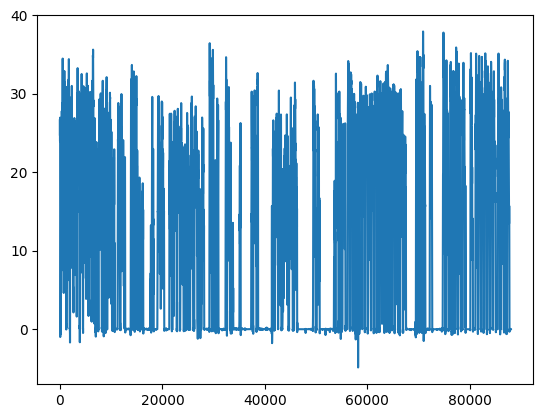

In [130]:
df_position_data_day4['Velocity'].plot()

### Or the position over time:

<AxesSubplot: >

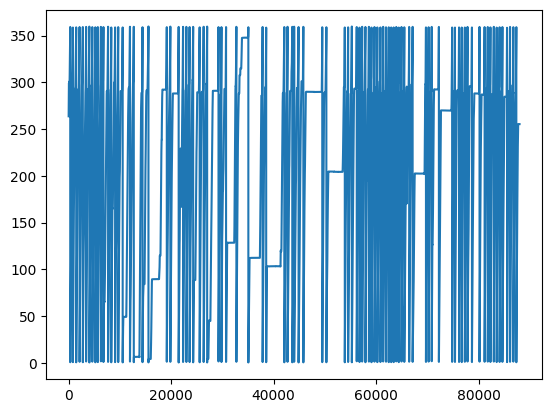

In [131]:
df_position_data_day4['Position'].plot()

### We can also plot the averaged velocity over position over all laps:

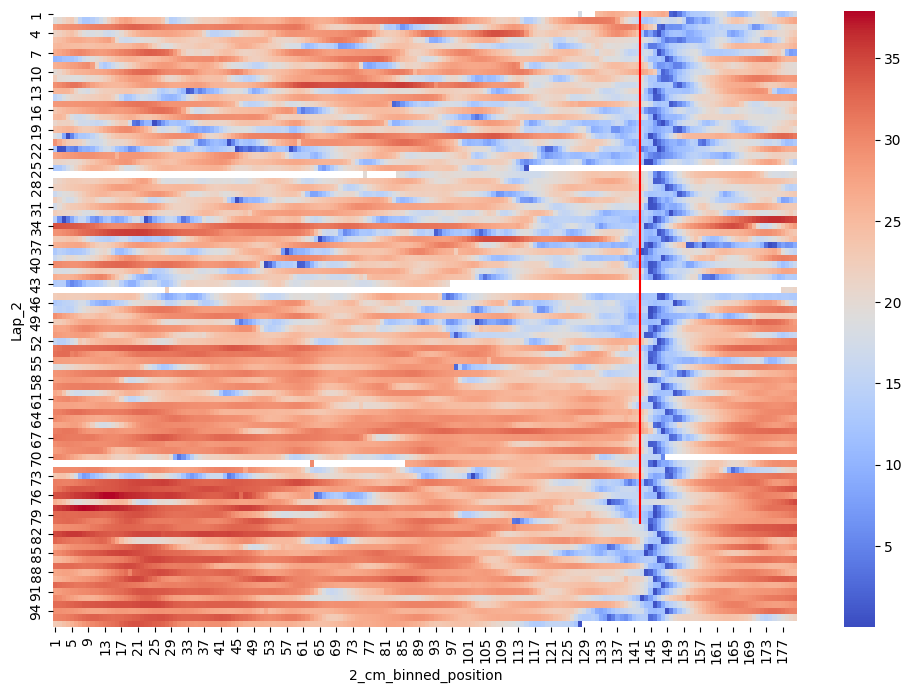

In [132]:
# Define which data frame is used - in this case we use the data frame that contains the position information
df = df_position_data_day4 

# We aligne the data - in this case we calculate the average velocity for each 2 cm bin
Velocity_over_Position = df.pivot_table(values='Velocity', index='Lap_2', columns='2_cm_binned_position', aggfunc='mean')

# We plot the lap number against the averaged velocity per bin. The velocity is color-coded.
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(Velocity_over_Position, annot=False, ax=ax, cmap="coolwarm")

# The reward position is indicated by a red vertical line.
ax.vlines(284/2, 0, 80, colors='red')

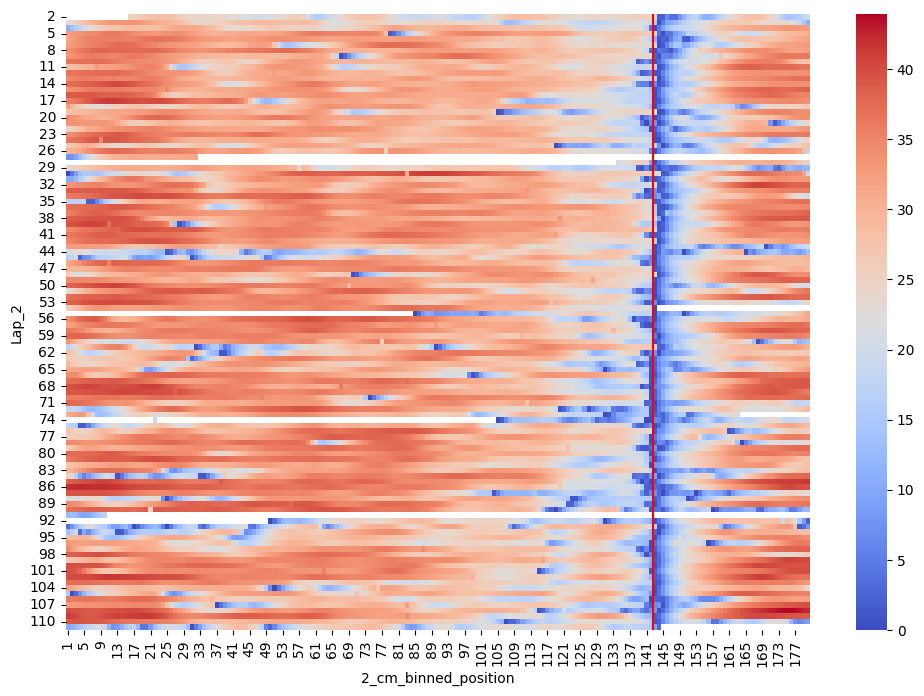

In [133]:
# Define which data frame is used - in this case we use the data frame that contains the position information
df = df_position_data_day8 

# We aligne the data - in this case we calculate the average velocity for each 2 cm bin
Velocity_over_Position = df.pivot_table(values='Velocity', index='Lap_2', columns='2_cm_binned_position', aggfunc='mean')

# We plot the lap number against the averaged velocity per bin. The velocity is color-coded.
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(Velocity_over_Position, annot=False, ax=ax, cmap="coolwarm")

# The reward position is indicated by a red vertical line.
ax.vlines(284/2, 0, 270, colors='red')

### **Question**: Can we draw conclusions about the behavior of the animal?

## **Event-triggered average**

### Load dataset

In [24]:
neural_data = pd.read_excel('D:/Manu/ADPV/2023/Data/17880_TestLaser/Registered/ts002/df_calcium_17880_ts002_5secStim8Hz08V.xlsx')

In [25]:
spiking_data = pd.read_excel('U:/PostDoc/Teaching/spiking_data_eta.xlsx')

### **Task:** Check out the data.

In [419]:
# Code goes here:


0         1         2         3         4         5         6    \
0     0.064314 -0.031223 -0.042197  0.019515  0.002070 -0.020286  0.056466   
1     0.066122 -0.065213  0.022026  0.016153  0.025182 -0.005990 -0.014053   
2     0.054200 -0.086965 -0.034422 -0.052223  0.010384 -0.056593  0.045571   
3     0.061192 -0.034801 -0.020693 -0.003124 -0.001023 -0.045022  0.038580   
4     0.085734 -0.075756 -0.003859  0.044993  0.038440 -0.055916  0.060322   
...        ...       ...       ...       ...       ...       ...       ...   
7995  0.031343 -0.071008 -0.029948 -0.012923  0.019806 -0.032134  0.008823   
7996  0.017802 -0.018046 -0.019515  0.047703  0.027785 -0.065610  0.033438   
7997  0.069108  0.021091 -0.081050 -0.013159  0.064339  0.002492 -0.031902   
7998  0.029301  0.011644 -0.089942 -0.053341 -0.018753 -0.049056  0.002330   
7999 -0.000383  0.003689 -0.064847 -0.028687  0.042312 -0.060194  0.009027   

           7         8         9    ...       788       789       790  \
0     0.047794 -0.028255  0.018493  ... -0.000389  0.038314 -0.026291   
1     0.089482 -0.041213  0.083282  ...  0.048093 -0.020054 -0.030025   
2     0.001922 -0.004925 -0.027035  ...  0.039087  0.010572  0.010916   
3     0.019028  0.030153  0.016164  ... -0.014166  0.024954  0.006691   
4     0.046657  0.003534  0.026496  ... -0.009200  0.066201  0.016442   
...        ...       ...       ...  ...       ...       ...       ...   
7995  0.227788 -0.057815  0.016047  ... -0.042960  0.017141 -0.012636   
7996  0.167574  0.020467  0.047200  ... -0.034813 -0.012035  0.023285   
7997  0.152118 -0.111591 -0.074885  ... -0.042856 -0.017310 -0.007319   
7998  0.146083  0.000474  0.016669  ... -0.064028 -0.018706 -0.058654   
7999  0.185886 -0.029545  0.094256  ... -0.087386 -0.056182 -0.040893   

           791       792       793       794       795       796       797  
0    -0.022919  0.021313 -0.085036 -0.280887  0.045892 -0.037827  0.355125  
1     0.008477  0.023335 -0.135291 -0.189156  0.043546  0.013983  0.320364  
2     0.056008 -0.044934 -0.161927 -0.167484  0.095647 -0.031688  0.303446  
3     0.014307 -0.018036 -0.059909 -0.195046  0.134384  0.003767  0.247711  
4     0.064350  0.008637 -0.087035 -0.164770  0.050782  0.039656  0.269758  
...        ...       ...       ...       ...       ...       ...       ...  
7995 -0.072624 -0.117973 -0.027064 -0.037237  0.075578  0.708324 -0.230317  
7996 -0.100210 -0.120918  0.002831 -0.061395  0.088595  0.704528 -0.226755  
7997 -0.054928 -0.115581  0.037625 -0.115118  0.097787  0.760232 -0.213068  
7998 -0.078591 -0.066327 -0.057135 -0.061942  0.053448  0.909673 -0.214092  
7999 -0.048425 -0.128346  0.030647 -0.069357  0.117153  0.713056 -0.233379  

[8000 rows x 798 columns]

### Plot some examplary traces.

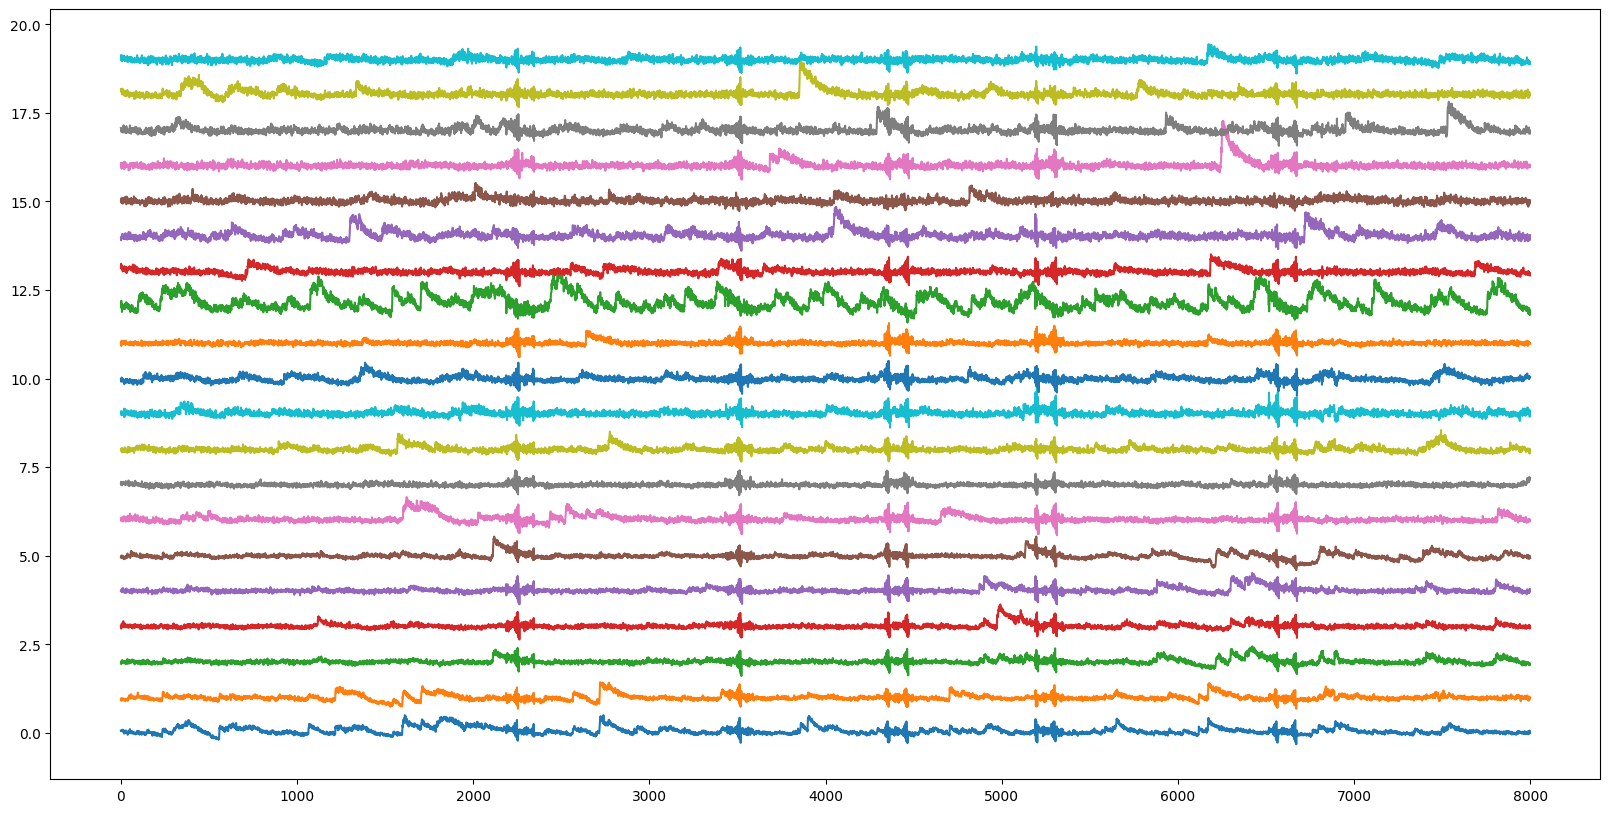

In [26]:
counter = 0

plt.figure(figsize=(20, 10))

for cell in range(20):
    plt.plot(neural_data[cell] + counter)
    counter = counter + 1

### We further normalize the data by calculating the z-score for normalizing the data.

In [27]:
# Calculate z-score from dFF (Optional)

raw_calcium = neural_data.T.values
#k = int(len(raw_calcium)/100*20)                    #uncomment if z-score is calculated from unnormalized data

z_score = []

for t in range(len(raw_calcium)):
    arr = raw_calcium[t]
    #F0 = arr.nsmallest(k).mean()
    std = arr.std()
    trace = arr/std                                  #if normalization is necessary: trace = (arr-F0)/std
    z_score.append(trace)

### In this recording we see the hippocampal CA1 region where PV+ Interneurons are optogenetically stimulated. We want to find out how the circuit responds to this.  

### **Task:** Go into the recording and retrieve the starting frames of each train of optogenetic stimulation.

In [418]:
# Please enter the time stamps of each start frame:

stimulation_start = np.asarray([])


### **Solution:**

In [28]:
stimulation_start = np.array([2187, 3432, 4335, 5191, 6518])

### For each neuron, we collect the individual responses to each optogenetic train. In total we have 5 trains of stimulation, so for each neuron we get 5 traces. 

In [29]:
event_tuning_calcium_total = []   # Final list calcium
event_tuning_spiking_total = []   # Final list spiking
stim_idx = stimulation_start   # Stimulation marks
n_data = z_score   # Neural data
s_data = spiking_data.T.values   # Spiking data


for neuron in range(len(n_data)):   # We loop through all cells in the dataset
    event_tuning_neuron = []   # We collect the 5 calcium response traces for each neuron in this list
    spiking_neuron = []   # Same for the spiking data
    for e in range(len(stim_idx)):   # We loop through the stimulation marks
        event_tuning_neuron.append(n_data[neuron][stim_idx[e]-160:stim_idx[e]+480])   # We retrieve a time window of -5 sec to +10 sec. In total 20 sec (or 640 frames)
        spiking_neuron.append(s_data[neuron][stim_idx[e]-160:stim_idx[e]+480])      # Same for the spiking data
    event_tuning_calcium_total.append(event_tuning_neuron)   # We append the 5 traces collected for the individual neuron to the final list
    event_tuning_spiking_total.append(spiking_neuron)   # Same for the spiking data

### Plot the 5 traces for an exemplary neuron. The red lines indicate the time window of stimulation.

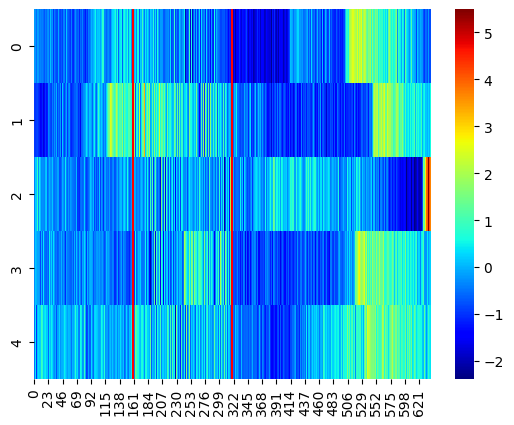

In [30]:
neuron = 264

sns.heatmap(event_tuning_calcium_total[neuron], cmap='jet')
plt.vlines(x=160, ymin=5, ymax=0, color='red')
plt.vlines(x=320, ymin=5, ymax=0, color='red')

#plt.savefig('Z:/Manuel/Brain³ 2023/Example_response_calcium.eps', format='eps')

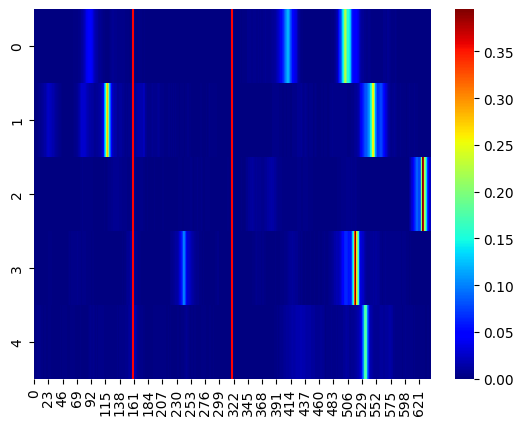

In [31]:
neuron = 264

sns.heatmap(event_tuning_spiking_total[neuron], cmap='jet')
plt.vlines(x=160, ymin=5, ymax=0, color='red')
plt.vlines(x=320, ymin=5, ymax=0, color='red')

#plt.savefig('Z:/Manuel/Brain³ 2023/Example_response_spiking.eps', format='eps')

### From this we now can calculate the average response for each neuron.

In [32]:
# Collect all averaged trial traces

avg_trials = []
avg_trials_spiking = []

for cell in range(np.asarray(event_tuning_calcium_total).shape[0]):
    avg_trials.append(np.mean(np.asarray(event_tuning_calcium_total)[cell], axis=0))
    avg_trials_spiking.append(np.mean(np.asarray(event_tuning_spiking_total)[cell], axis=0))

### Plot all average traces.

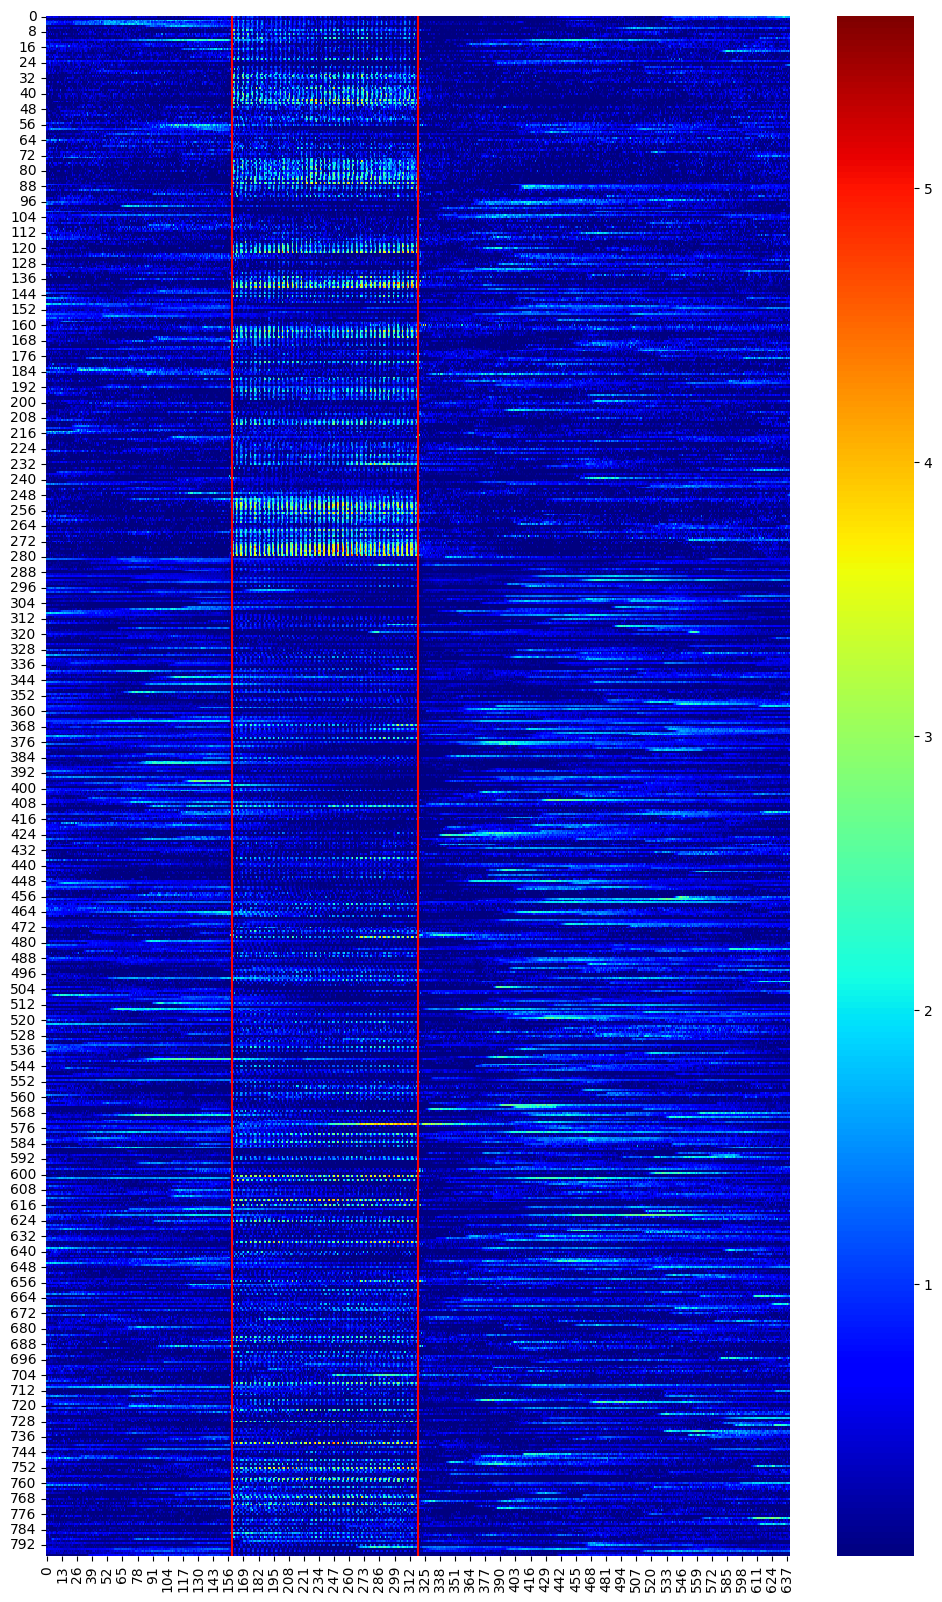

In [33]:
plt.figure(figsize=(12,20));

sns.heatmap(np.asarray(avg_trials)[:, 0:], cmap='jet', vmin=0.01)
plt.vlines(x=160, ymin=810, ymax=0, color='red')
plt.vlines(x=320, ymin=810, ymax=0, color='red')

### **Question:** What do you see?

## **Dimensionality reduction**

### Next we prepare the data, so that we can perform principal component anaylsis (PCA). First we extract the part of the recording that we want to use for the PCA.

### **Task:** What part of the recording would make most sense? Enter the time points you want to use below.

In [34]:
# Enter starting frame and ending frame

start_frame = 320
end_frame = 480


In [35]:
neural_data_postStim = np.asarray(avg_trials)[:, start_frame:end_frame].reshape(np.shape(np.asarray(avg_trials)[:, start_frame:end_frame])[0],np.shape(np.asarray(avg_trials)[:, start_frame:end_frame])[1])

### Perform PCA.

In [36]:
# create the model
pca = decomposition.PCA(n_components=4)
# fit the model on training data
pca.fit(neural_data_postStim)
# transformation on 2D space
pca_neural_data = pca.transform(neural_data_postStim)

### Plot scatter plot of first 2 principal components (PCs). 

Text(0, 0.5, 'PC2')

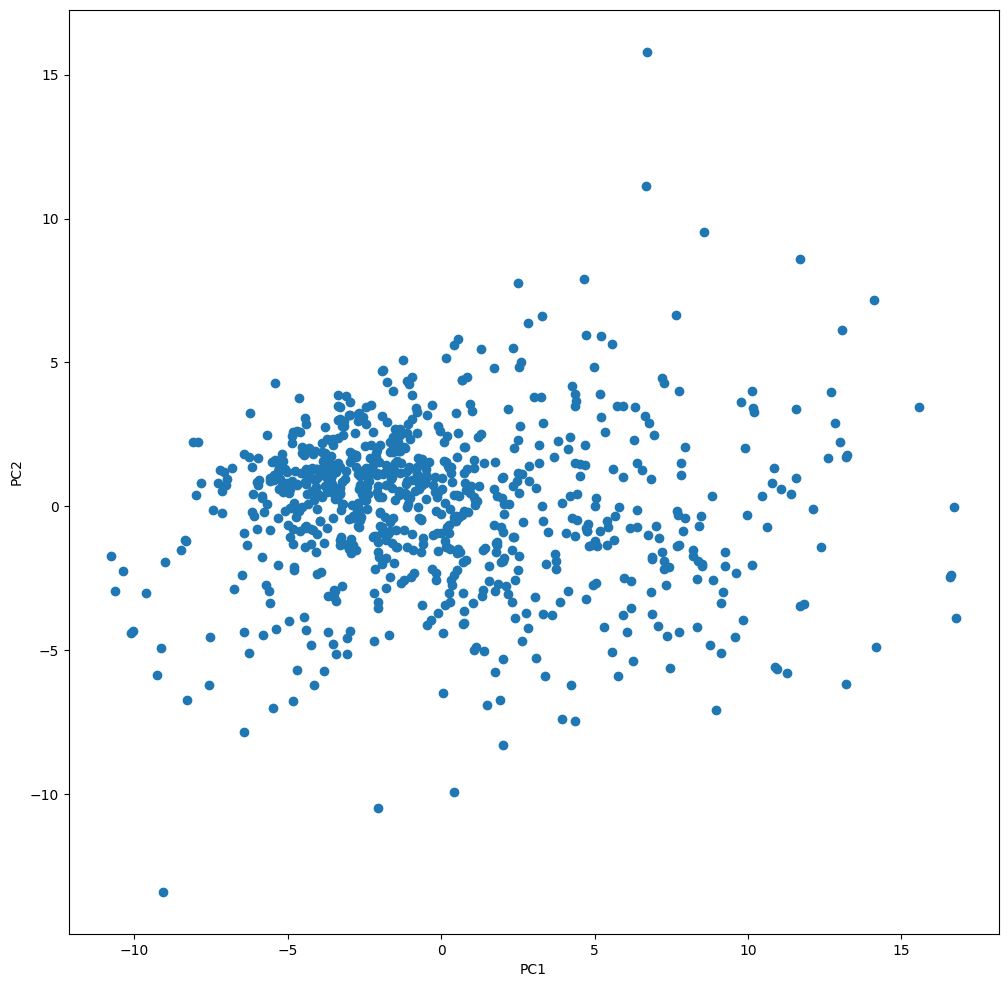

In [37]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
pcm = ax.scatter(pca_neural_data[:,0], pca_neural_data[:,1])
#fig.colorbar(pcm, ax=ax)
plt.xlabel('PC1')
plt.ylabel('PC2')

### **Question:** What do you see?

## **Clustering**

### Perform clustering on dimension-reduced data.

### **Question:** Where would you expect the clusters?

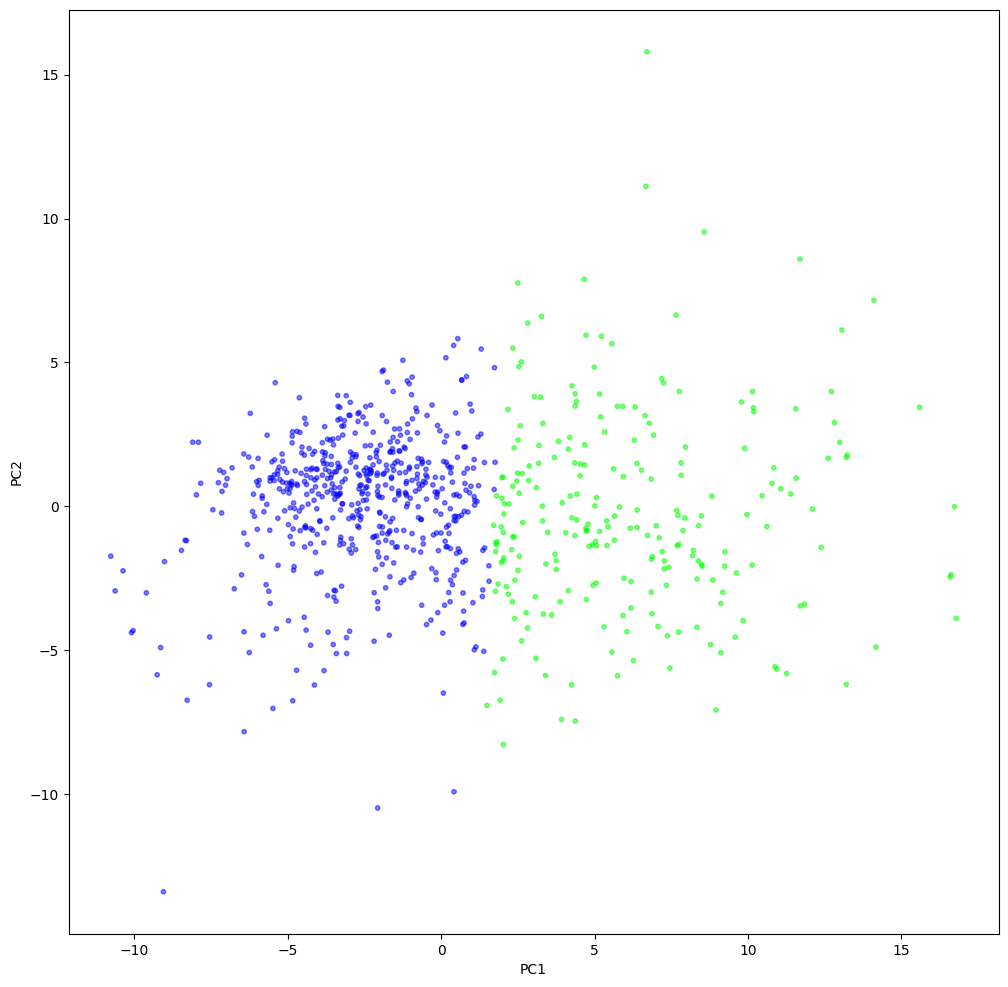

In [39]:
x = pca_neural_data

kmeans_euclidean = KMeansEuclidean(2)
y_kmeans_euclidean = kmeans_euclidean.fit(x).predict(x) # assign each smaple to a cluster

#plot results
plt.figure(figsize=(12,12))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans_euclidean, s=10, cmap='brg', alpha=0.5);

#plt.savefig('Z:/Manuel/Brain³ 2023/Cluster.eps', format='eps')

### Plot average traces separated according to their cluster identity.

(0.0, 639.0, -0.10285806944309889, 1.0414696214703318)

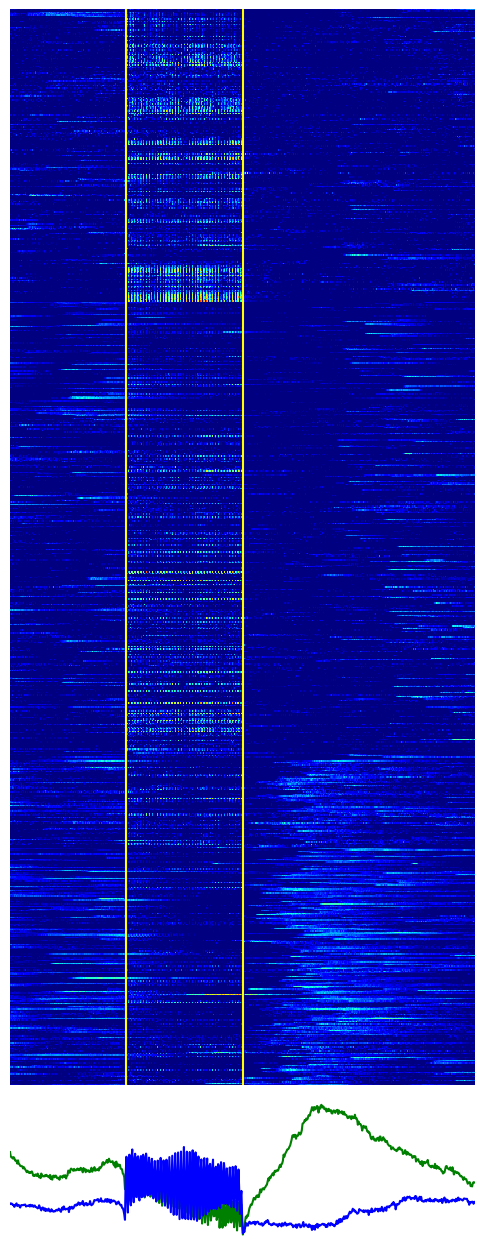

In [40]:
heatmap_InhEx_Traces = np.concatenate((np.asarray(avg_trials)[np.asarray(y_kmeans_euclidean) == 0][:, :], np.asarray(avg_trials)[np.asarray(y_kmeans_euclidean) == 1][:, :]))

fig = plt.figure(figsize=(6, 16))

gs = gridspec.GridSpec(16, 2, figure=fig)
ax1 = fig.add_subplot(gs[:14, :])
ax1 = sns.heatmap(heatmap_InhEx_Traces, vmin=0.4, cmap='jet', cbar=False)

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left=False,       # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off


plt.vlines(x=160, ymin=810, ymax=0, color='yellow')
plt.vlines(x=320, ymin=810, ymax=0, color='yellow')

ax2 = fig.add_subplot(gs[14:, :])
ax2.plot(np.mean(np.asarray(avg_trials)[np.asarray(y_kmeans_euclidean) == 1][:,:], axis=0), color='green');
ax2.plot(np.mean(np.asarray(avg_trials)[np.asarray(y_kmeans_euclidean) == 0][:,:], axis=0), color='blue');
ax2.margins(x=0)
ax2.axis('off')

### There is a lot of noise due to the optogenetic stimulation. We can plot the inferred spiking to see the cleared response.

(0.0, 639.0, 0.00141086829450971, 0.03718949190228206)

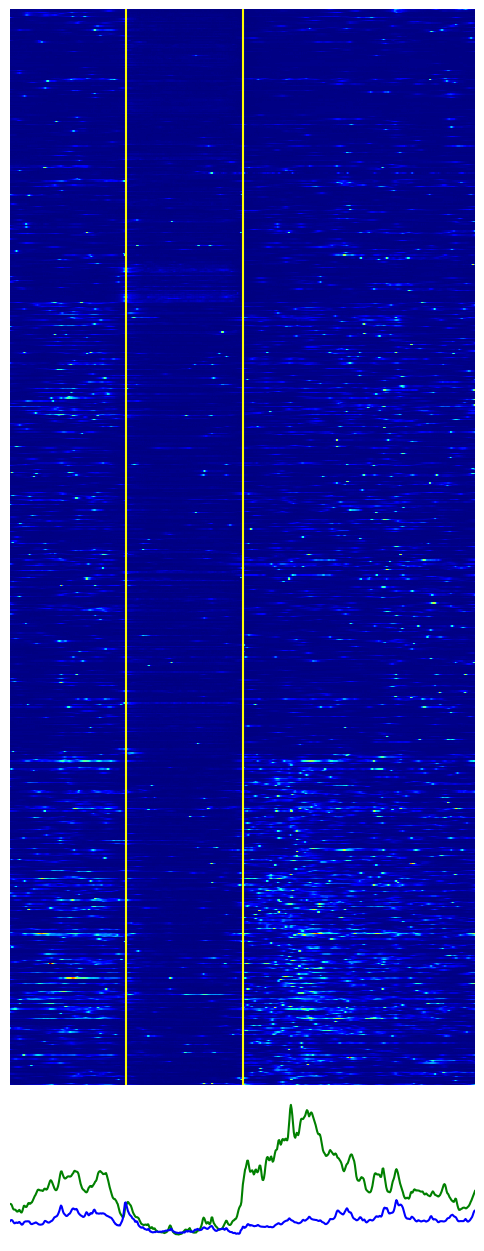

In [41]:
heatmap_InhEx_Traces = np.concatenate((np.asarray(avg_trials_spiking)[np.asarray(y_kmeans_euclidean) == 0][:, :], np.asarray(avg_trials_spiking)[np.asarray(y_kmeans_euclidean) == 1][:, :]))

fig = plt.figure(figsize=(6, 16))

gs = gridspec.GridSpec(16, 2, figure=fig)
ax1 = fig.add_subplot(gs[:14, :])
ax1 = sns.heatmap(heatmap_InhEx_Traces, cmap='jet', cbar=False)

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left=False,       # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off


plt.vlines(x=160, ymin=810, ymax=0, color='yellow')
plt.vlines(x=320, ymin=810, ymax=0, color='yellow')

ax2 = fig.add_subplot(gs[14:, :])
ax2.plot(np.mean(np.asarray(avg_trials_spiking)[np.asarray(y_kmeans_euclidean) == 1][:,:], axis=0), color='green');
ax2.plot(np.mean(np.asarray(avg_trials_spiking)[np.asarray(y_kmeans_euclidean) == 0][:,:], axis=0), color='blue');
ax2.margins(x=0)
ax2.axis('off')

In [42]:
heatmap_InhEx_Traces_BLPopulationActivity = np.concatenate((np.asarray(n_data)[np.asarray(y_kmeans_euclidean) == 0][:, :975], np.asarray(n_data)[np.asarray(y_kmeans_euclidean) == 1][:, :975]))

(0.0, 974.0, -0.06170447315042401, 1.1834470053506576)

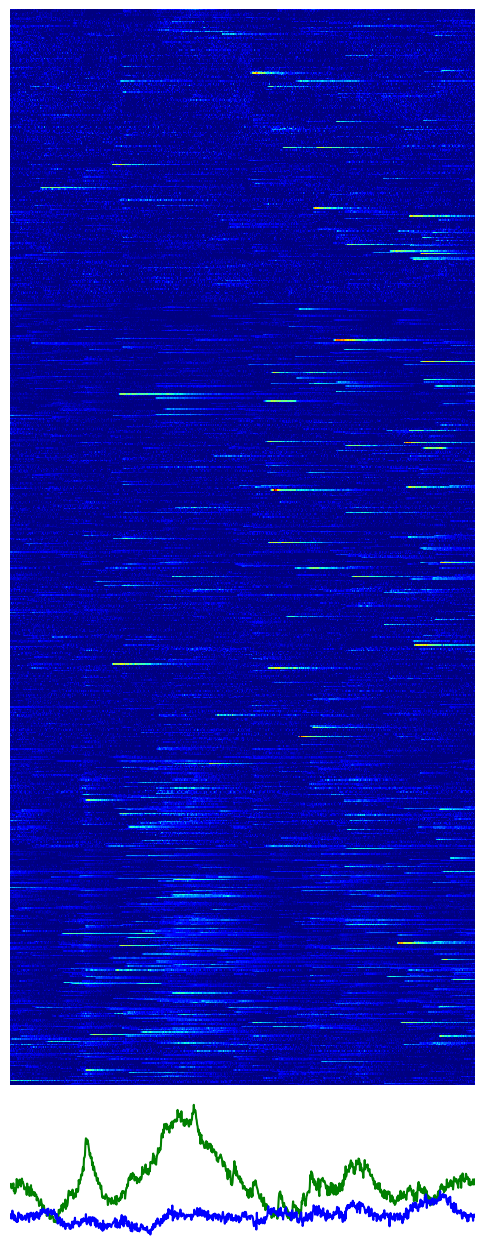

In [43]:
fig = plt.figure(figsize=(6, 16))

gs = gridspec.GridSpec(16, 2, figure=fig)
ax1 = fig.add_subplot(gs[:14, :])
ax1 = sns.heatmap(heatmap_InhEx_Traces_BLPopulationActivity, vmin=0.01, cmap='jet', cbar=False)

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left=False,       # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off


#ax1.vlines(x=160, ymin=661, ymax=0, color='yellow')
#ax1.vlines(x=320, ymin=661, ymax=0, color='yellow')

ax2 = fig.add_subplot(gs[14:, :])
ax2.plot(np.mean(np.asarray(n_data)[np.asarray(y_kmeans_euclidean) == 1][:,:975], axis=0), color='green');
ax2.plot(np.mean(np.asarray(n_data)[np.asarray(y_kmeans_euclidean) == 0][:,:975], axis=0), color='blue');
ax2.margins(x=0)
ax2.axis('off')

## **Spatial tuning**

### **Task:** Check out both data sets (df_calcium_day6 and df_calcium_day11).

In [27]:
# Code goes here

### Visualize running behavior

<AxesSubplot: xlabel='2_cm_binned_position', ylabel='Lap_2'>

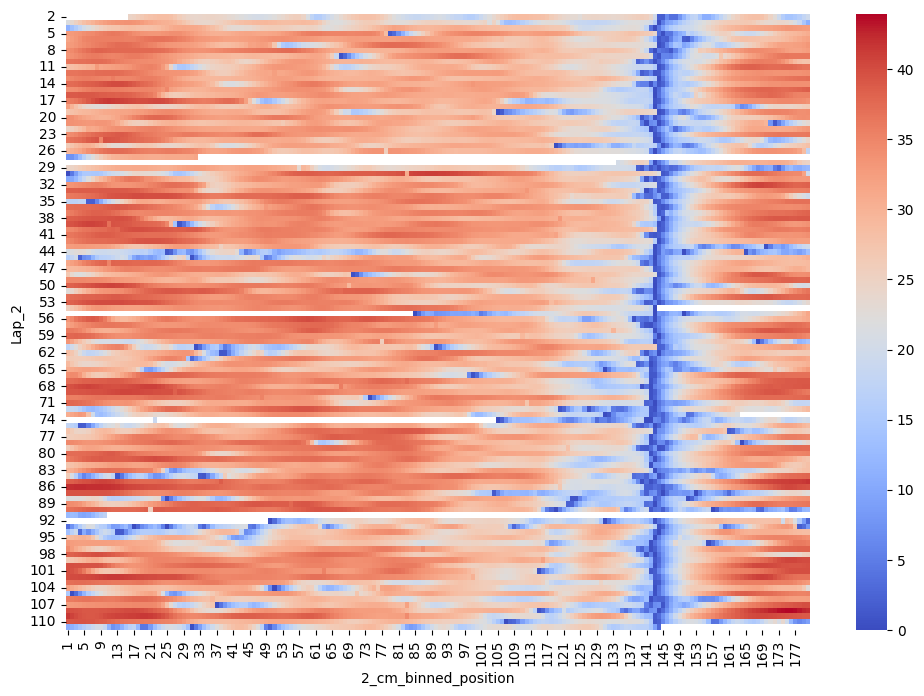

In [134]:
# Define which data frame is used - in this case we use the data frame that contains the position information
df = df_calcium_day8 

# We aligne the data - in this case we calculate the average velocity for each 2 cm bin
Velocity_over_Position = df.pivot_table(values='Velocity', index='Lap_2', columns='2_cm_binned_position', aggfunc='mean')

# We plot the lap number against the averaged velocity per bin. The velocity is color-coded.
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(Velocity_over_Position, annot=False, ax=ax, cmap="coolwarm")


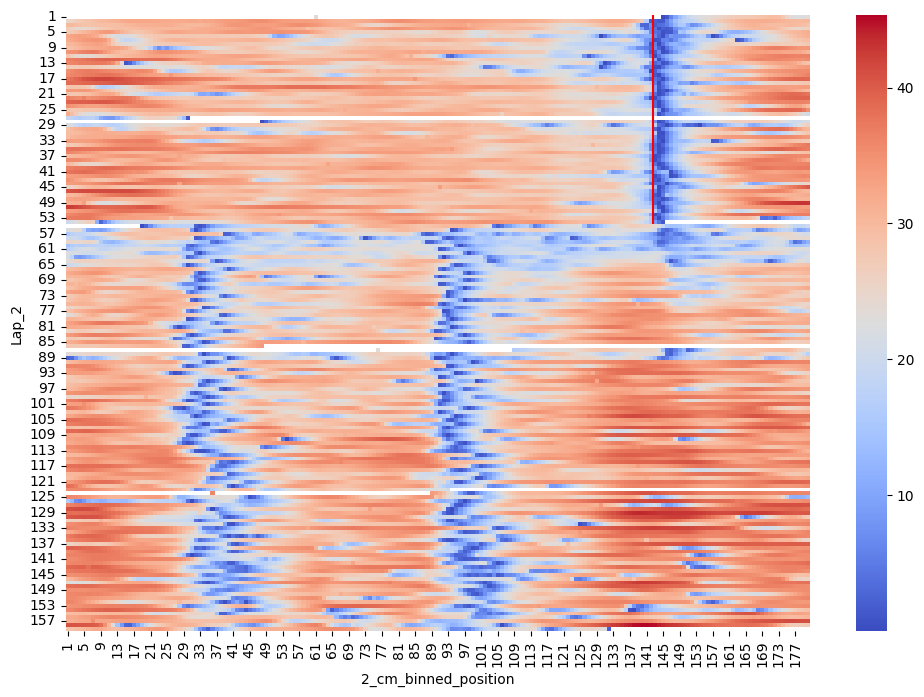

In [140]:
# Define which data frame is used - in this case we use the data frame that contains the position information
df = df_calcium_day10 

# We aligne the data - in this case we calculate the average velocity for each 2 cm bin
Velocity_over_Position = df.pivot_table(values='Velocity', index='Lap_2', columns='2_cm_binned_position', aggfunc='mean')

# We plot the lap number against the averaged velocity per bin. The velocity is color-coded.
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(Velocity_over_Position, annot=False, ax=ax, cmap="coolwarm")

# The reward position is indicated by a red vertical line.
ax.vlines(284/2, 0, 54, colors='red')

### Check out spatial tuning of cells

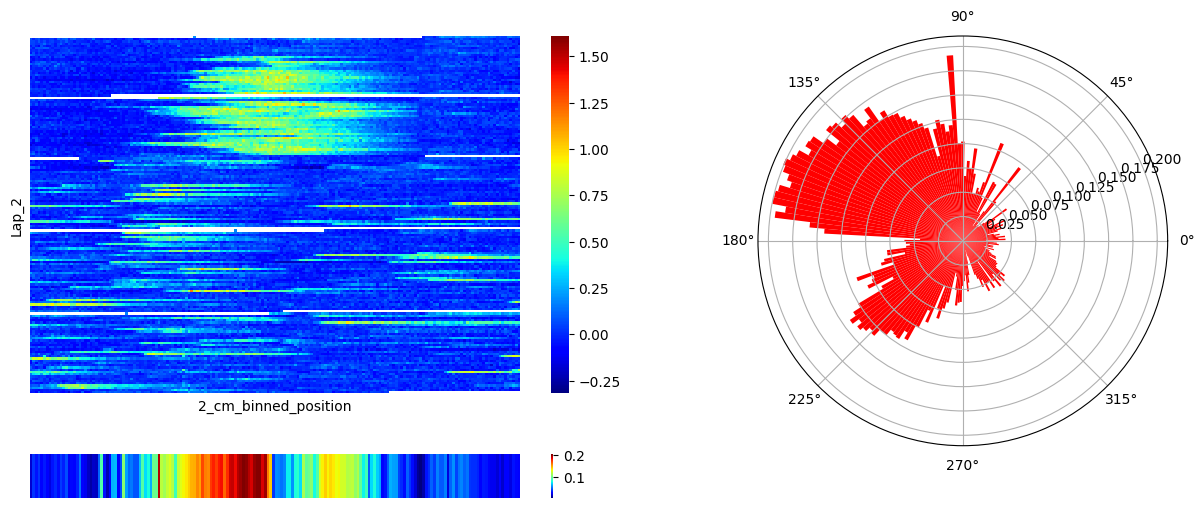

In [153]:
# Define data frame
df = df_calcium_day10

# Define Cell 
Cell = 111

# Create figure
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(9, 16, figure=fig)

# Plot heatmap of averaged deltaF/F for each 2 cm bin
ax1 = fig.add_subplot(gs[:7, :8])
firing = df.pivot_table(Cell, 'Lap_2', '2_cm_binned_position')
binned_avg = df.pivot_table(values=Cell, columns='2_cm_binned_position', aggfunc='sum')
ax1 = sns.heatmap(firing, vmin=df[Cell].min(), vmax=df[Cell].max(), ax=ax1, cmap='jet');
ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left=False,       # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off


# Plot average over spatial bins
ax2 = fig.add_subplot(gs[8:, :8])
avg_flour = df.pivot_table(values=Cell, columns='2_cm_binned_position', aggfunc='mean')
sns.heatmap(avg_flour, annot=False, ax=ax2, vmin=np.min(avg_flour.values), vmax=np.max(avg_flour.values), cmap='jet');
ax2.axis('off')

#Plot circular plot
binned_mean = df.pivot_table(values=Cell, columns='2_cm_binned_position', aggfunc='mean')
radii = binned_mean.to_numpy()

ax3 = fig.add_subplot(gs[:8, 8:], polar=True)
N = 180
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
#radii = np.arange(0, N)
width = 2*np.pi / N
bars = ax3.bar(theta, radii[0], width=width, bottom=0.0, color='red')

### This plotting is rather calculation power intensiv. The circular plot is not necessarily required for inspection. 

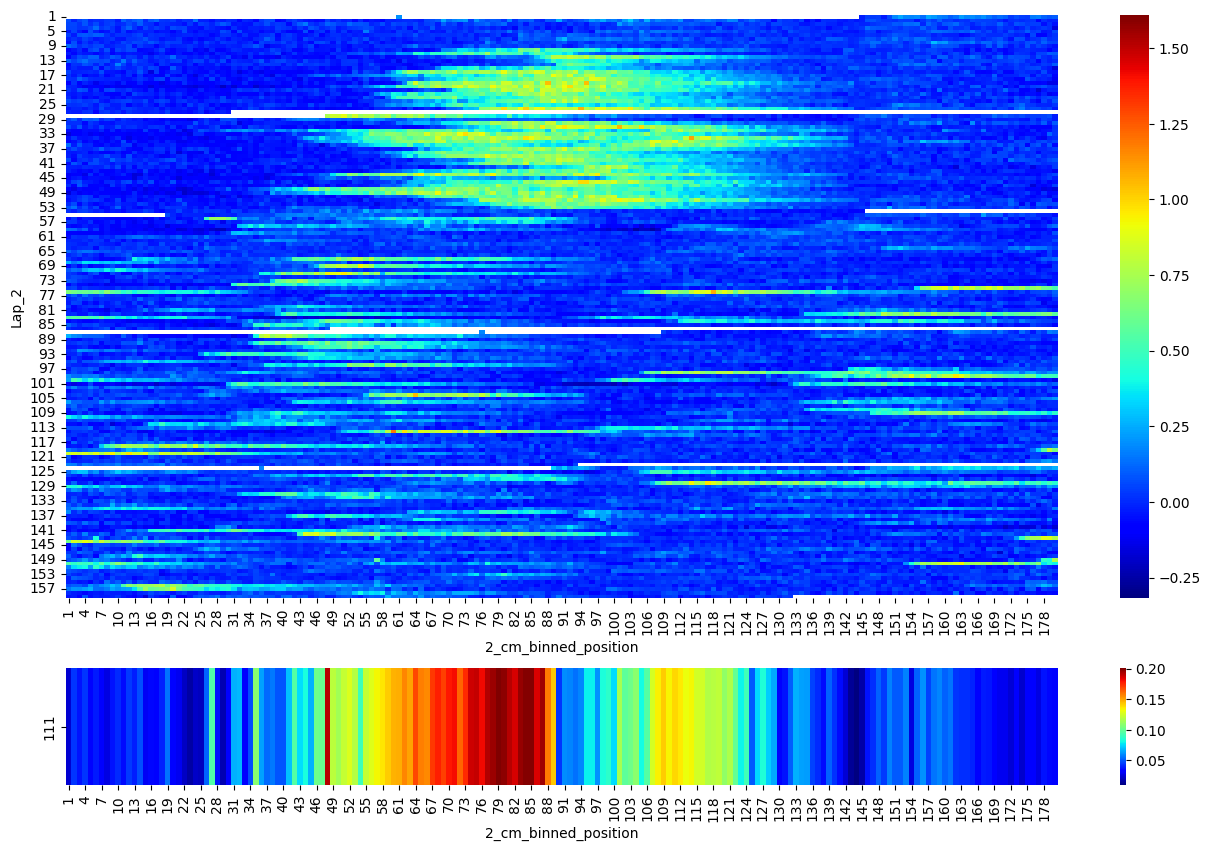

In [154]:
# Define data frame
df = df_calcium_day10

# Define target cell
cell=111

#Plot heatmap
plot_heatmap(cell, df, save=False, save_path='U:/PostDoc/Teaching/Cell_111.png', cmap_c='jet')

### **Task:** Explore the data. What are your thoughts? Specifically concider following points:  
- **Is there a difference in representation between day 1 and day 2?**
- **Do you observe events that you can relate to concepts previously learned in the course?**

## **Information rate**  
Spiking of CA1 neurons obviously carries information about space. Therefore, in this chapter we are going to calculate the spatial information, which can be used as a metric for defining and quantifying place cell integrity. 
Following equation will be used:

$\sum \limits _{j=1} ^{n} p_{i} \frac{\lambda_{i}}{\lambda} log_{2} (\frac{\lambda_{i}}{\lambda})$

where λi the mean firing rate in the i-th bin, λ the overall mean firing rate and pi the probability 
of the animal being in the i-th bin (occupancy in the i-th bin/total recording time). Spatial 
information in bits/spike was obtained by dividing the information rate with the mean firing 
rate of the cell. (taken from: Hoydal et al, 2020).

### Helper function

In [180]:
def calculate_information_rate(data_frame, cell):
    occ_time = data_frame.pivot_table(values='Time_counter', columns='2_cm_binned_position', aggfunc='sum')/np.sum(data_frame.pivot_table(values='Time_counter', columns='2_cm_binned_position', aggfunc='sum').values)
    bfr = data_frame.pivot_table(values=cell, columns='2_cm_binned_position', aggfunc='sum').values/(data_frame.pivot_table(values='Time_counter', columns='2_cm_binned_position', aggfunc='sum').values/30)
    mfr = data_frame[cell].sum()/len(data_frame['Time'])
    bits_per_spike = np.nansum(occ_time.values*(bfr/mfr)*np.log(bfr/mfr)/np.log(2))
    return bits_per_spike

def bootstrap_fragments_shuffled(df, cell, Samples, window_size):
    peaks = []
    for m in range(Samples):
        fl_trace = np.array_split(df[cell], window_size)
        shuf_trace = shuffle(fl_trace)
        shuf_trace = pd.concat(shuf_trace)
        shuffled_df = pd.DataFrame({'Cell': shuf_trace.values, 'Position_binned': df['Position_binned'].values})
        avg_flour_shuffled = shuffled_df.pivot_table(values='Cell', columns='Position_binned', aggfunc='mean')
        peak_value = avg_flour_shuffled.T.max().values[0]
        peaks.append(peak_value)
    return peaks

### Load example data

In [305]:
# Dataset #2
import time

start = time.time()

df_spiking_day2 = pd.read_excel('D:/Manu/ADPV/2023/Data/Animal_17905/17905_BL4/Registered/all/DataFrame_Imaging_spiking_17905_BL4.xlsx')

end = time.time()
print(end - start)

580.7912347316742


### Calculate spatial information for each cell

In [185]:
df = df_spiking_day8.loc[df_spiking_day8['Velocity'] > 3]

cell_number = np.shape(df_spiking_day8.iloc[:,18:])[1]

spatial_information_results = []
df['Time_counter'] = np.ones(len(df))

for cell in range(cell_number):
    cell_spatial_information = calculate_information_rate(df, cell)
    spatial_information_results.append(cell_spatial_information)

C:\Users\mittagm\AppData\Local\Temp\ipykernel_12548\1794094826.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **Task:** The cells can be sorted according to their spatial information value (ascending order). Check out the cells with low spatial information score and those with high spatial infromation score.

In [186]:
np.argsort(spatial_information_results)

array([ 80, 126,  70, 306,  78, 648,  77, 229, 125,  81,  79, 238, 117,
        73, 536,  74, 186,  33, 188, 226, 482, 303,  72, 208, 181,  68,
       588, 185, 462,  71,  76, 233, 119, 282, 535, 284, 305, 580, 586,
       289, 467, 446, 132, 231, 601, 553, 625, 218, 310, 445, 127, 124,
       209, 633, 531, 405, 234, 336, 224, 423, 615, 543, 450, 380, 301,
       335, 202,  47, 121, 182, 604, 189, 655, 339, 599, 675, 654, 403,
       285, 498, 249, 171, 680, 268, 577, 492, 297, 359, 657, 342, 338,
       563, 116, 519,  88, 638, 642,  30, 177, 666, 270, 684, 154, 307,
       330, 444, 565, 499, 168, 569, 697, 184, 658, 368, 101, 392, 481,
       490, 572, 667, 139, 398, 334, 571, 421, 144,  49, 529, 693, 135,
       394, 183, 408, 491, 187, 295, 118, 286, 332, 215, 287, 278, 304,
        31, 640, 616, 431, 418, 160, 448, 416, 275, 557, 561,  85, 554,
       524, 634, 411, 114, 663, 605, 473, 584, 280, 567, 429, 412, 180,
       300, 340, 699, 225, 308, 255, 574, 277, 271,  75, 600, 31

In [160]:
print('Cell with highest score: Cell# {} - {}'.format(np.argsort(spatial_information_results)[-1], spatial_information_results[np.argsort(spatial_information_results)[-1]]))
print('Cell with lowest score: Cell# {} - {}'.format(np.argsort(spatial_information_results)[1], spatial_information_results[np.argsort(spatial_information_results)[1]]))

Cell with highest score: Cell# 362 - 197.1220156400015
Cell with lowest score: Cell# 126 - 147.76416963771194


### Now we can visualize the spatial firing (spiking) for individual cells.

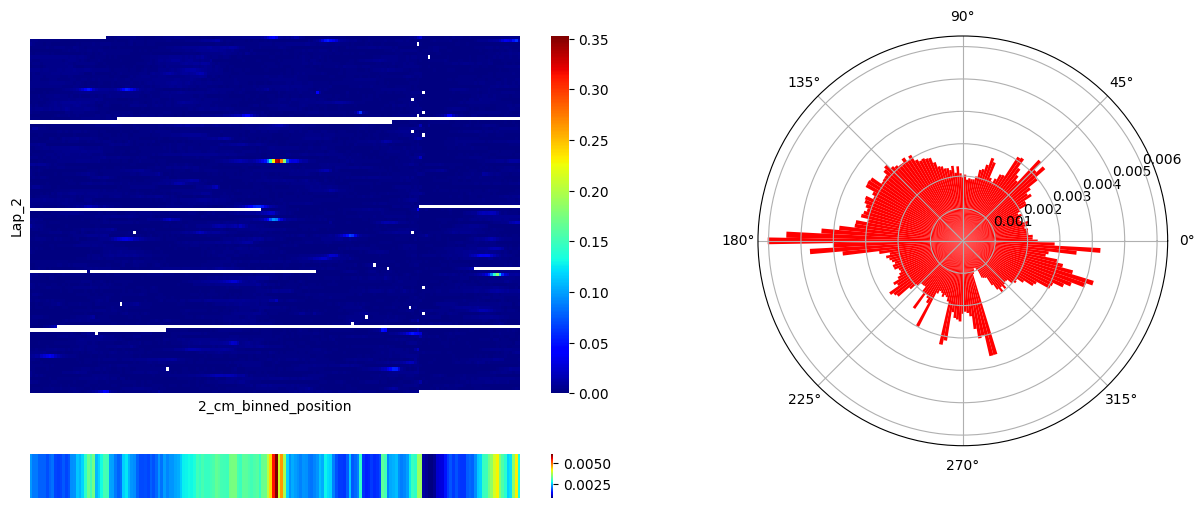

In [195]:
# Define data frame
df = df_spiking_day8.loc[df_spiking_day8['Velocity'] > 3]

# Define Cell 
Cell = 188

# Create figure
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(9, 16, figure=fig)

# Plot heatmap of averaged deltaF/F for each 2 cm bin
ax1 = fig.add_subplot(gs[:7, :8])
firing = df.pivot_table(Cell, 'Lap_2', '2_cm_binned_position')
binned_avg = df.pivot_table(values=Cell, columns='2_cm_binned_position', aggfunc='sum')
ax1 = sns.heatmap(firing, vmin=df[Cell].min(), vmax=df[Cell].max(), ax=ax1, cmap='jet');
ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left=False,       # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off


# Plot average over spatial bins
ax2 = fig.add_subplot(gs[8:, :8])
avg_flour = df.pivot_table(values=Cell, columns='2_cm_binned_position', aggfunc='mean')
sns.heatmap(avg_flour, annot=False, ax=ax2, vmin=np.min(avg_flour.values), vmax=np.max(avg_flour.values), cmap='jet');
ax2.axis('off')

#Plot circular plot
binned_mean = df.pivot_table(values=Cell, columns='2_cm_binned_position', aggfunc='mean')
radii = binned_mean.to_numpy()

ax3 = fig.add_subplot(gs[:8, 8:], polar=True)
N = 180
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
#radii = np.arange(0, N)
width = 2*np.pi / N
bars = ax3.bar(theta, radii[0], width=width, bottom=0.0, color='red')

#plt.savefig(save_path, format='eps')

### Compared to the z-scored version, this looks much more sparse.

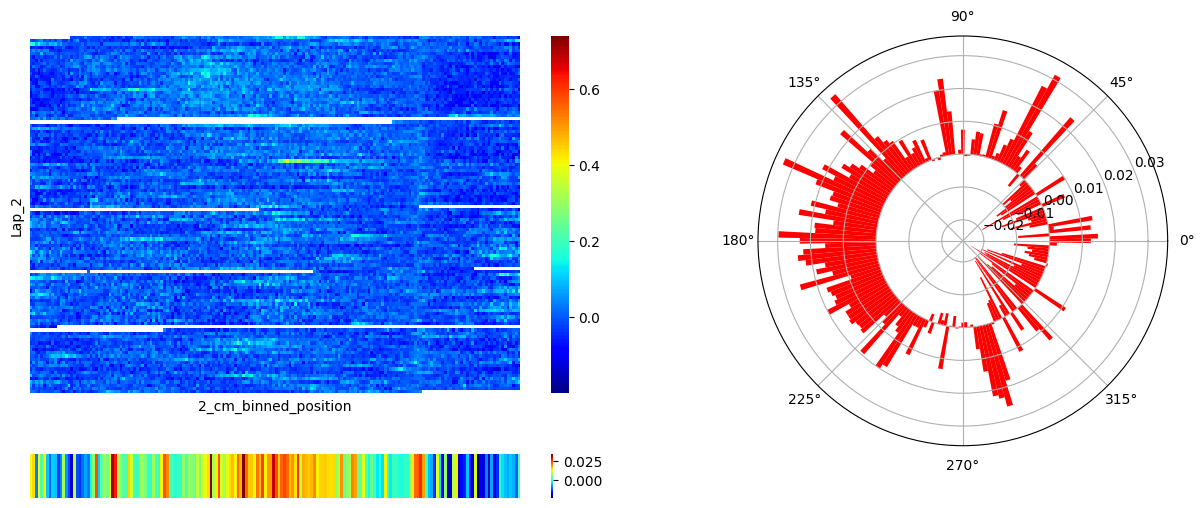

In [193]:
# Define data frame
df = df_calcium_day8

# Define Cell 
Cell = 188

# Create figure
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(9, 16, figure=fig)

# Plot heatmap of averaged deltaF/F for each 2 cm bin
ax1 = fig.add_subplot(gs[:7, :8])
firing = df.pivot_table(Cell, 'Lap_2', '2_cm_binned_position')
binned_avg = df.pivot_table(values=Cell, columns='2_cm_binned_position', aggfunc='sum')
ax1 = sns.heatmap(firing, vmin=df[Cell].min(), vmax=df[Cell].max(), ax=ax1, cmap='jet');
ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left=False,       # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off


# Plot average over spatial bins
ax2 = fig.add_subplot(gs[8:, :8])
avg_flour = df.pivot_table(values=Cell, columns='2_cm_binned_position', aggfunc='mean')
sns.heatmap(avg_flour, annot=False, ax=ax2, vmin=np.min(avg_flour.values), vmax=np.max(avg_flour.values), cmap='jet');
ax2.axis('off')

#Plot circular plot
binned_mean = df.pivot_table(values=Cell, columns='2_cm_binned_position', aggfunc='mean')
radii = binned_mean.to_numpy()

ax3 = fig.add_subplot(gs[:8, 8:], polar=True)
N = 180
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
#radii = np.arange(0, N)
width = 2*np.pi / N
bars = ax3.bar(theta, radii[0], width=width, bottom=0.0, color='red')

### **Question:** Do you notice anything interesting?

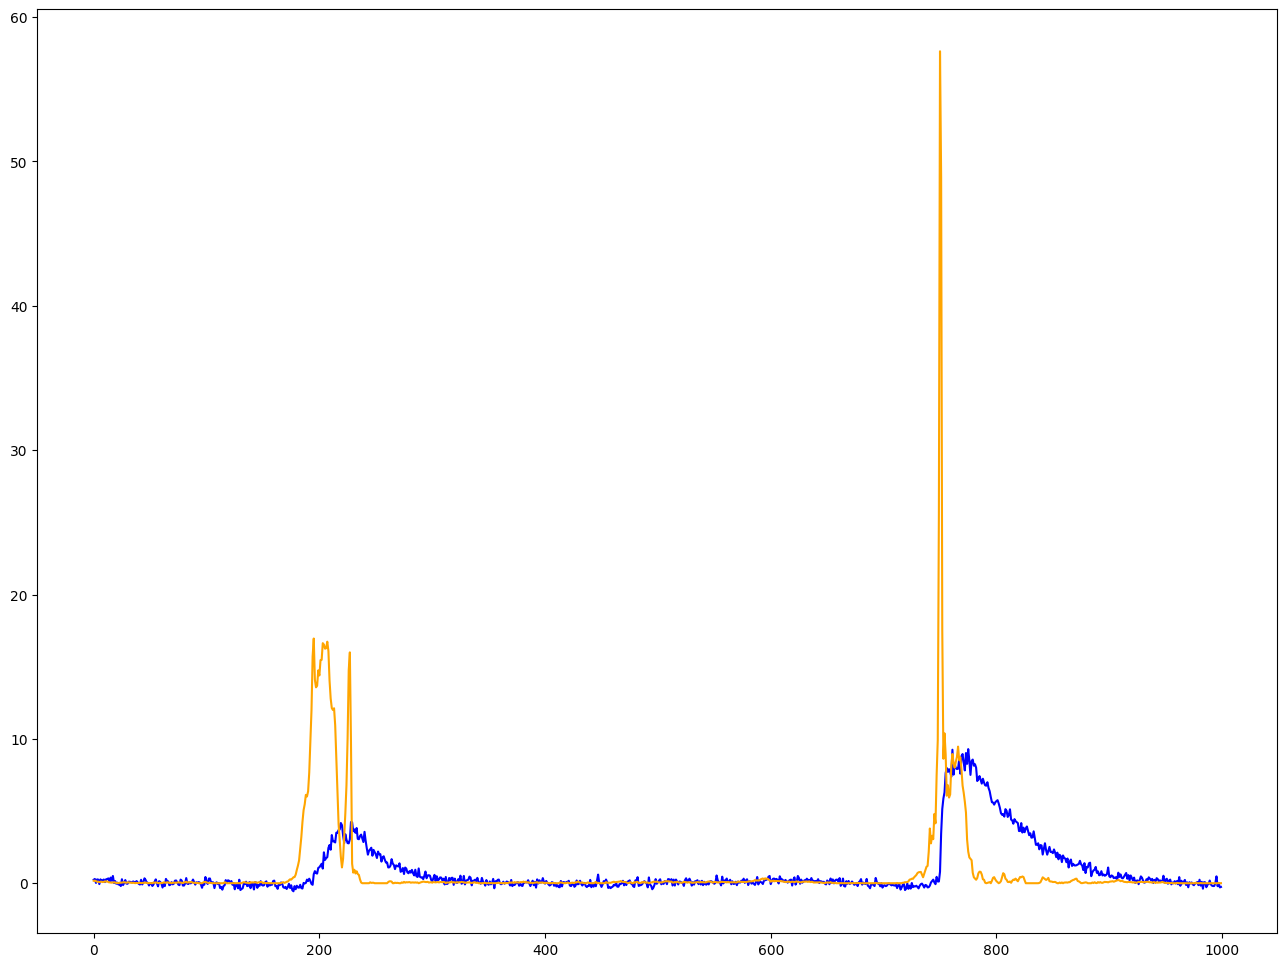

In [164]:
plt.figure(figsize=(16,12))

# Plot the dF/F
plt.plot(df_calcium_day8[362].values[18000:19000]*3, color='blue')

# For comparison, plot the inferred spiking in blue
plt.plot(df_spiking_day8[362].values[18000:19000]*32, color='orange')

## **Bootstrapping**

### "Bootstrapping statistics is a form of hypothesis testing that involves resampling a single data set to create a multitude of simulated samples. Those samples are used to calculate standard errors, confidence intervals and for hypothesis testing."

### We split the recording (velocity > 2 cm/sec) for an individual cell into random-sized (5 sec < 10 sec) snipplets and reassamble them in random order. From this we calculate the new peak firing rate and compare it to the original one. This we repeat 500 times.

c:\Users\mittagm\Anaconda3\envs\facemap\lib\site-packages\numpy\lib\shape_base.py:790: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

c:\Users\mittagm\Anaconda3\envs\facemap\lib\site-packages\numpy\lib\shape_base.py:790: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

c:\Users\mittagm\Anaconda3\envs\facemap\lib\site-packages\numpy\lib\shape_base.py:790: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated 

c:\Users\mittagm\Anaconda3\envs\facemap\lib\site-packages\numpy\lib\shape_base.py:790: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

c:\Users\mittagm\Anaconda3\envs\facemap\lib\site-packages\numpy\lib\shape_base.py:790: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

c:\Users\mittagm\Anaconda3\envs\facemap\lib\site-packages\numpy\lib\shape_base.py:790: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated 

Percentage of smaller peaks: 39.0%
37.36872959136963


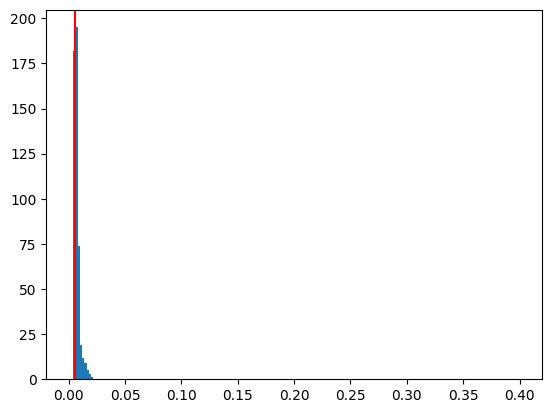

In [196]:
df = df_spiking_day8.loc[df_spiking_day8['Velocity'] > 3]
start = time.time()

frame_rate = 30
cell = 188
bst_test_2 = bootstrap_fragments_shuffled(df=df, cell=cell, Samples=500, window_size=int(len(df[cell])/randrange(frame_rate*5, frame_rate*10)))
plt.hist(bst_test_2, bins=200, range=(0,0.4))
plt.axvline(df.pivot_table(values=cell, columns='Position_binned', aggfunc='mean').T.max().values[0], color='red')

bst_result = bst_test_2 < df.pivot_table(values=cell, columns='Position_binned', aggfunc='mean').T.max().values[0]
print("Percentage of smaller peaks: {}%".format((np.count_nonzero(bst_result == True)/(len(bst_result)/100))))

end = time.time()
print(end - start)

### Load data frame with quantification for all cells.

In [197]:
df_place_cell_evaluation = pd.read_excel(
    'C:/Users/mittagm/Documents/Python_Scripts/Master_Neuroscience_WPM31_Neuronal_circuit_dysfunction_of_CNS_diseases/Data/18170/Day8/DataFrame_Place_Cell_Analysis_18170_day8.xlsx', engine='openpyxl')

In [198]:
df_place_cell_evaluation

Peak value   Peak position  Information rate  \
0      0.214142  [296.0, 297.0)          4.369119   
1      0.066399  [296.0, 297.0)          3.197816   
2      0.180882  [296.0, 297.0)          3.327514   
3      0.180721  [296.0, 297.0)          3.512625   
4      0.108275  [296.0, 297.0)          3.512161   
..          ...             ...               ...   
694    0.055236  [296.0, 297.0)          3.111783   
695    0.024966  [296.0, 297.0)          2.910606   
696    0.034524  [296.0, 297.0)          3.287378   
697    0.019319  [296.0, 297.0)          2.602905   
698    0.068177  [296.0, 297.0)          3.378907   

     Percentile of smaller peaks  Peak Idx  
0                          100.0        65  
1                           96.8        56  
2                          100.0        18  
3                          100.0        58  
4                           99.8         4  
..                           ...       ...  
694                         97.2        24  
695                         77.8        56  
696                         90.6        45  
697                         70.4        66  
698                        100.0        58  

[699 rows x 5 columns]

### Select only those neurons that have >95% fraction of smaller peaks.

In [199]:
target_df = df_place_cell_evaluation
df_moving = df_spiking_day8[df_spiking_day8['Velocity'] > 2]

idxLst = []

for c in (np.asarray(target_df.loc[target_df['Percentile of smaller peaks'] > 95].index)):
    idxLst.append(np.argmax(df_moving.pivot_table(values=c, columns='5_cm_binned_position', aggfunc='mean')))
          
dic = {'Identified place cells' : np.asarray(target_df.loc[target_df['Percentile of smaller peaks'] > 95].index), 'Peak Idx' : idxLst, 'Inf rate' : np.asarray(target_df['Information rate'].loc[target_df['Percentile of smaller peaks'] > 95])}
df_place_cells = pd.DataFrame(data=dic)

In [200]:
df_place_cells

Identified place cells  Peak Idx  Inf rate
0                         0        65  4.369119
1                         1        56  3.197816
2                         2        18  3.327514
3                         3        58  3.512625
4                         4         4  3.512161
..                      ...       ...       ...
446                     688        54  2.945645
447                     689        68  3.211182
448                     691        46  3.119335
449                     694        24  3.111783
450                     698        58  3.378907

[451 rows x 3 columns]

### Sort those neurons according to their peak position.

In [201]:
df_place_cell_sorted = df_place_cells.sort_values(by = 'Peak Idx', ascending=False)

In [202]:
df_place_cell_sorted[-100:-60]

Identified place cells  Peak Idx  Inf rate
177                     268        13  2.552279
141                     213        13  3.593056
381                     584        13  2.696991
111                     167        13  3.825471
170                     261        13  5.071685
116                     174        13  3.492109
372                     573        13  3.329395
196                     314        12  3.192369
258                     404        12  3.075377
167                     258        12  3.468126
335                     515        12  3.865976
186                     291        12  3.009432
409                     624        12  2.849803
403                     616        11  2.657171
419                     640        11  2.659763
302                     468        11  3.148547
387                     593        11  2.837891
55                       83        11  3.270853
340                     523        11  3.222796
202                     320        11  3.567396
332                     512        11  3.285725
399                     611        10  3.532987
390                     596        10  3.030033
414                     630        10  3.348236
297                     460        10  3.434380
19                       19        10  3.587503
411                     627        10  2.903918
307                     475        10  3.239479
162                     252        10  3.365414
239                     372        10  4.586388
7                         7        10  2.892456
437                     676        10  3.145848
277                     434        10  2.853182
135                     206         9  3.281551
406                     621         8  3.221677
201                     319         8  4.107435
90                      140         8  3.987157
300                     464         8  3.520978
169                     260         8  5.352066
424                     651         7  3.589499

### Plot ordered cells as heatmap.

In [204]:
bla = sns.diverging_palette(260, 300, s=60, as_cmap=True)

In [209]:
bla = px.colors.sequential.Plasma

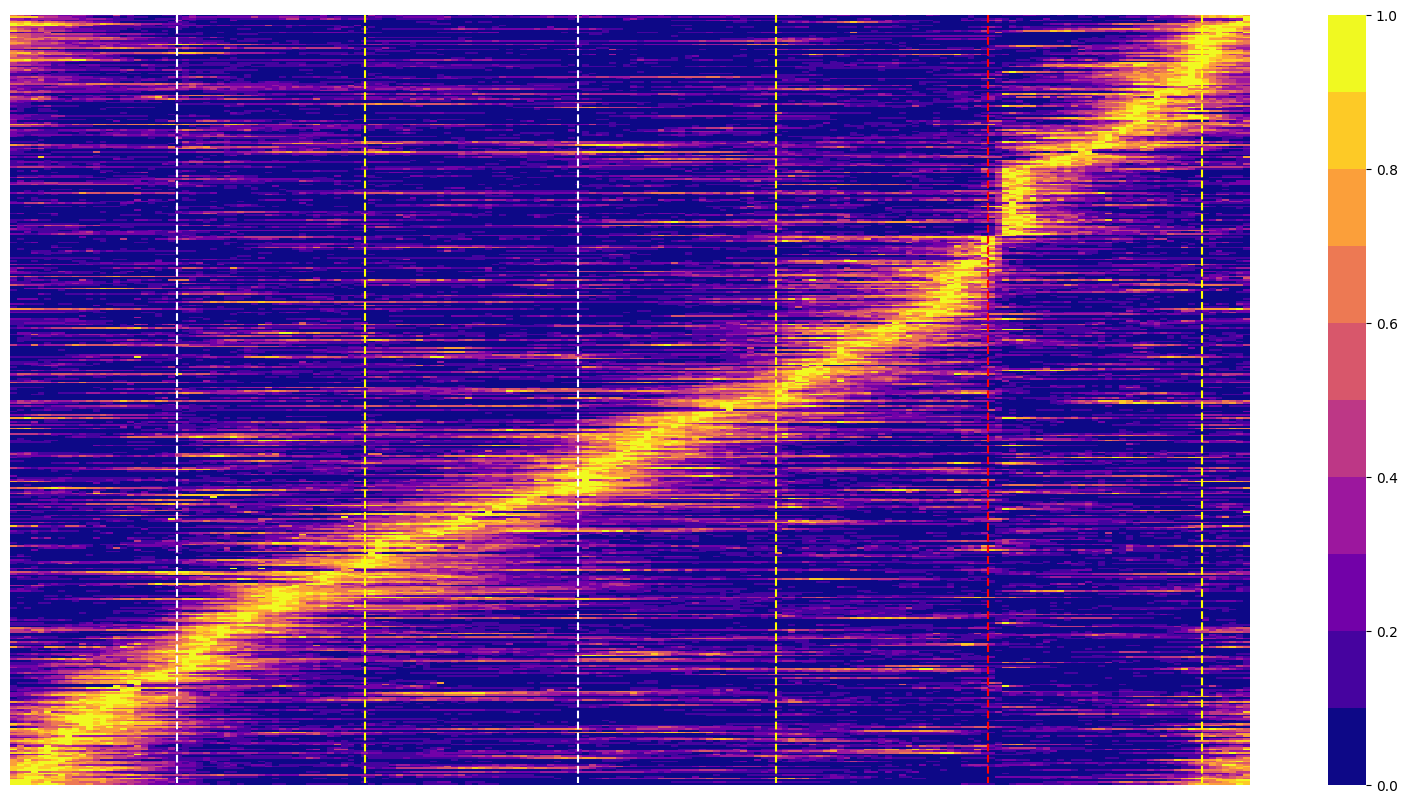

In [210]:
PlaceCellsSorted = []
PlaceCellsNormSorted = []

df_moving = df_spiking_day8.iloc[32:-32, :][df_spiking_day8.iloc[32:-32, :]['Velocity'] > 3]
df = df_place_cells.sort_values(by = 'Peak Idx', ascending=False, ignore_index=True)
count = 0

for c in df['Identified place cells'].values:
    s = df_moving.pivot_table(values=c, columns='2_cm_binned_position', aggfunc='mean').values[0]
    #print(s.max())
    scaler = MinMaxScaler()
    t = scaler.fit_transform(s.reshape(-1,1))
    #print(t.max())
    PlaceCellsSorted.append(s)
    PlaceCellsNormSorted.append(t.T[0])
    count = count + 1
    #print(count)
    
fig = plt.figure(figsize=(20,10))
sns.heatmap(PlaceCellsNormSorted, cmap=bla)   #YlGnBu_r

plt.vlines(48.4/2, 0, 450, linestyles='dashed', colors='white')
plt.vlines(103.2/2, 0, 450, linestyles='dashed', colors='yellow')

plt.vlines(164.8/2, 0, 450, linestyles='dashed', colors='white')
plt.vlines(222.4/2, 0, 450, linestyles='dashed', colors='yellow')

plt.vlines(284/2, 0, 450, linestyles='dashed', colors='red')
plt.vlines(346/2, 0, 450, linestyles='dashed', colors='yellow')

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left=False,       # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off

#plt.savefig('U:/PostDoc/Workshops/CAJAL 2023/Place_cell_map.eps', format='eps')

### Plot the average population activity of those place cells.

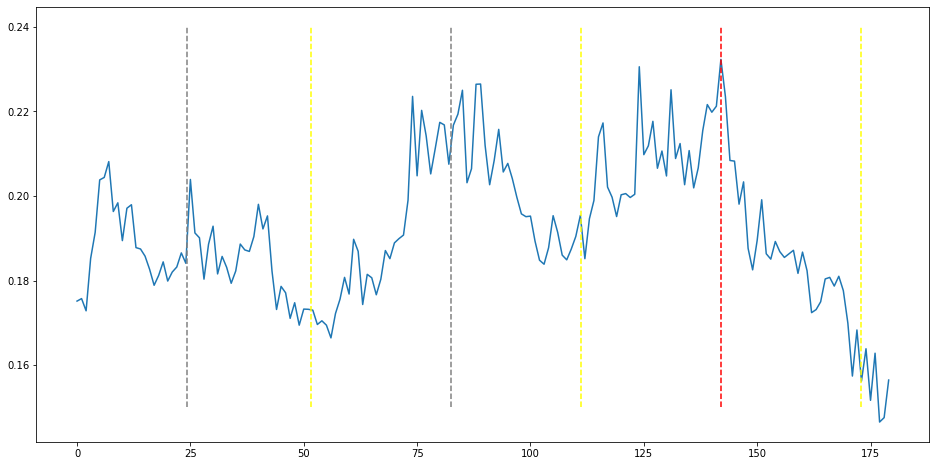

In [788]:
fig = plt.figure(figsize=(16, 8))

plt.plot(np.mean(PlaceCellsNormSorted, axis=0))

plt.vlines(48.4/2, 0.15, 0.24, linestyles='dashed', colors='grey')
plt.vlines(103.2/2, 0.15, 0.24, linestyles='dashed', colors='yellow')

plt.vlines(164.8/2, 0.15, 0.24, linestyles='dashed', colors='grey')
plt.vlines(222.4/2, 0.15, 0.24, linestyles='dashed', colors='yellow')

plt.vlines(284/2, 0.15, 0.24, linestyles='dashed', colors='red')
plt.vlines(346/2, 0.15, 0.24, linestyles='dashed', colors='yellow')

### **Question:** What can we conclude from this?

### Other representation (line-plot) of the ordered place cells (just because it looks nice ;)).

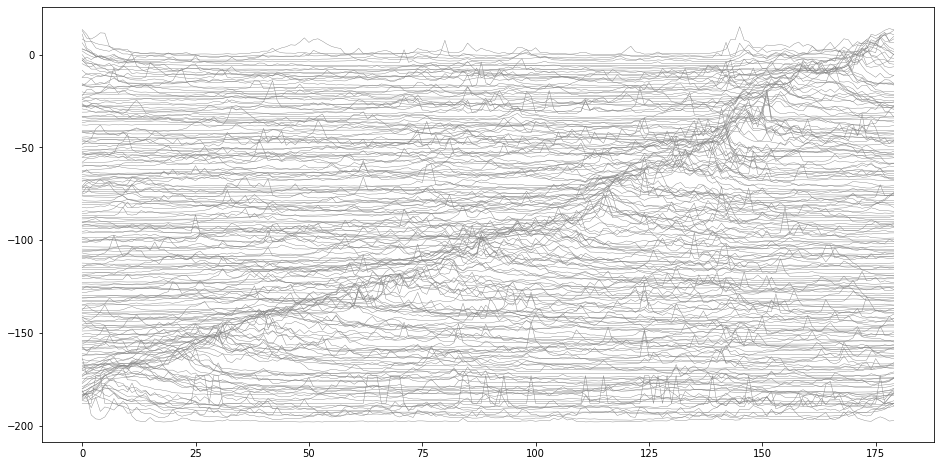

In [836]:
counter = 0

fig = plt.figure(figsize=(16, 8))

for trace in PlaceCellsNormSorted:
    plt.plot(trace*15 + counter, color='grey', linewidth=0.4)
    counter = counter - 1

## Low dimensional latent representation of neural data

### Data recorded from neural activity is high dimensional, stochastic and inherently messy. Analyzing the hidden patterns within neural data is essential for our understanding of how brain activity leads to behavior.
1. **Understanding Latent Representations**
>Latent representations are underlying features or variables that are not directly observable but can be inferred from observed data. In the context of neural activity, these representations capture the essential information about the brain's functioning from the complex and high-dimensional neural data.
2. **Neural Data and Dimensionality Reduction**
>Neural data, such as recordings from EEG, fMRI, or single-neuron activity, are typically high-dimensional and noisy. Dimensionality reduction techniques are used to extract latent representations from this data. A very commonly used example for a dimensionality reduction technique is Principal Component Analysis (PCA).

##### First we define our data frame. We filter for segments, where the running speed is over 3 cm/sec.

In [171]:
df = df_calcium_day4.loc[df_calcium_day4['Velocity'] > 3]

##### We define our number of neurons - meaning the dimension of our feature space. We also define the bin size over which we want to average the neural activity over time.

In [169]:
n_neurons = 698
bin_size = 6

##### We chose to display 48000 frames. The data is organized, so that in the end these 48000 frames are separated into 9000 bins for which we average the neural activity for each feature (neuron). This we can do using the following code:

In [172]:
# Binning and averageing for the neural data...
data_neuro_A = np.mean(np.reshape(df.values[-48000: ,16:], (int(48000/bin_size), n_neurons, int(bin_size))), axis=2)
# ...for the position data...
data_position_A = np.mean(np.reshape(df['Position'].values[-48000:], (int(48000/bin_size), int(bin_size))), axis=1, dtype=int)
# ...and for the velocity data.
data_velocity_A = np.mean(np.reshape(df['Velocity'].values[-48000:], (int(48000/bin_size), int(bin_size))), axis=1)

##### Finally, we can perform the PCA over the neural data. By this we can reduce the dimensionality of each time bin from 629 features to 3.

In [ ]:
X_A = data_neuro_A

pca = PCA(n_components=20)
X_A_pca = pca.fit_transform(X_A)

# Creating figure
fig = plt.figure(figsize = (14, 14))
ax = plt.axes(projection ="3d")

#x = pca_avg_position['PC1']
#y = pca_avg_position['PC2']
#z = pca_avg_position['PC3']

x = X_A_pca[:54000,0]
y = X_A_pca[:54000,1]
z = X_A_pca[:54000,2]

##### The following code summarizes the previous steps and plots the results. 

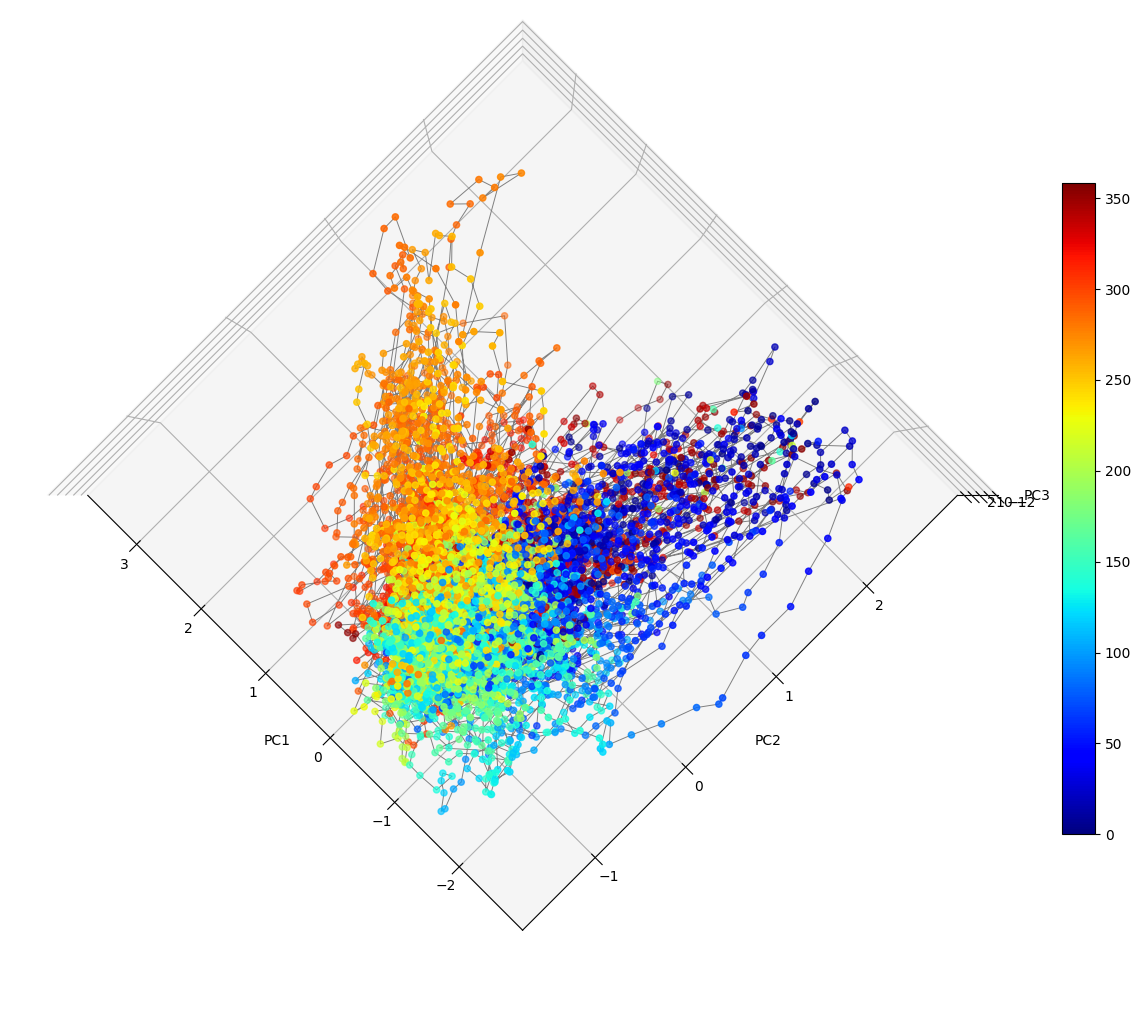

In [173]:
df = df_calcium_day4.loc[df_calcium_day4['Velocity'] > 3]

n_neurons = 698

bin_size = 6

# Binning and averageing for the neural data...
data_neuro_A = np.mean(np.reshape(df.values[-48000: ,16:], (int(48000/bin_size), n_neurons, int(bin_size))), axis=2)
# ...for the position data...
data_position_A = np.mean(np.reshape(df['Position'].values[-48000:], (int(48000/bin_size), int(bin_size))), axis=1, dtype=int)
# ...and for the velocity data.
data_velocity_A = np.mean(np.reshape(df['Velocity'].values[-48000:], (int(48000/bin_size), int(bin_size))), axis=1)


X_A = data_neuro_A

pca = PCA(n_components=20)
X_A_pca = pca.fit_transform(X_A)

# Creating figure
fig = plt.figure(figsize = (14, 14))
ax = plt.axes(projection ="3d")

#x = pca_avg_position['PC1']
#y = pca_avg_position['PC2']
#z = pca_avg_position['PC3']

x = X_A_pca[:48000,0]
y = X_A_pca[:48000,1]
z = X_A_pca[:48000,2]

#print(X_A_pca[:,0])

# Creating plot
#ax.scatter3D(x, y, z, c=pca_avg_position.index, cmap='jet')
p = ax.scatter3D(x, y, z, c=data_position_A[:48000], cmap='jet')
ax.plot(x,y,z, color='grey', linewidth=0.7)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(elev=-90, azim=45, roll=0)

fig.colorbar(p, ax=ax, fraction=0.03)

##### We do the same for the data for day 11.

In [175]:
df_calcium_day8.loc[df_calcium_day8['Velocity'] > 3]

ResoTrigger         Time    Position   Lap   Velocity  Pump  \
0                 1     0.000000   31.666710   2.0  24.603884   0.0   
1                 2     0.031249   32.548529   2.0  24.953235   0.0   
2                 3     0.062497   33.429235   2.0  25.316286   0.0   
3                 4     0.093746   34.311414   2.0  25.675645   0.0   
4                 5     0.124994   35.198599   2.0  26.026774   0.0   
...             ...          ...         ...   ...        ...   ...   
109971        21980  3436.437526  286.267281  20.0   5.280453   1.0   
109972        21981  3436.468774  286.295844  20.0   4.716878   1.0   
109973        21982  3436.500023  286.351497  20.0   4.189444   1.0   
109974        21983  3436.531271  286.408229  20.0   3.714408   1.0   
109975        21984  3436.562520  286.447098  20.0   3.284220   1.0   

        optotrigger  Licks  Licking_MM Position_binned  ...       690  \
0                 1    0.0         0.0    [31.0, 32.0)  ...  0.413112   
1                 1    0.0         0.0    [32.0, 33.0)  ...  0.414890   
2                 1    0.0         0.0    [33.0, 34.0)  ...  0.489878   
3                 1    0.0         0.0    [34.0, 35.0)  ...  0.674357   
4                 1    0.0         0.0    [35.0, 36.0)  ...  0.602946   
...             ...    ...         ...             ...  ...       ...   
109971            1    0.0         1.0  [286.0, 287.0)  ...  0.183780   
109972            1    0.0         1.0  [286.0, 287.0)  ...  0.159149   
109973            1    0.0         1.0  [286.0, 287.0)  ...  0.041735   
109974            1    0.0         1.0  [286.0, 287.0)  ...  0.003644   
109975            1    0.0         1.0  [286.0, 287.0)  ... -0.108374   

             691       692       693       694       695       696       697  \
0       0.376497 -0.021498  0.087747 -0.072791  0.279810 -0.020074  0.063173   
1       0.301016 -0.000448  0.094153 -0.004193  0.389472 -0.016404 -0.012292   
2       0.247286 -0.063846  0.089719  0.000000  0.319468 -0.031062  0.037995   
3       0.299594  0.019071  0.147248 -0.033376  0.422936 -0.042911  0.043211   
4       0.269746 -0.005861  0.138282  0.003307  0.324234 -0.067728  0.064291   
...          ...       ...       ...       ...       ...       ...       ...   
109971  0.088988  0.031732  0.069552  0.033856  0.050840  0.006256  0.050964   
109972  0.119212 -0.001441  0.049587  0.034701  0.030986  0.083398 -0.023686   
109973  0.033028  0.003089  0.031281  0.068181  0.023311 -0.054664  0.027854   
109974  0.116999 -0.028275 -0.017608  0.034302 -0.018205  0.016818 -0.039614   
109975  0.125863  0.018255 -0.028591 -0.060066  0.036940  0.014164 -0.020958   

             698       699  
0      -0.080398  0.071558  
1      -0.117096 -0.041891  
2      -0.062568  0.007262  
3      -0.136210 -0.045701  
4      -0.057422 -0.030433  
...          ...       ...  
109971  0.191304  0.006581  
109972  0.078713 -0.009240  
109973  0.181422  0.013236  
109974  0.038480 -0.039524  
109975  0.151234  0.014119  

[48857 rows x 718 columns]

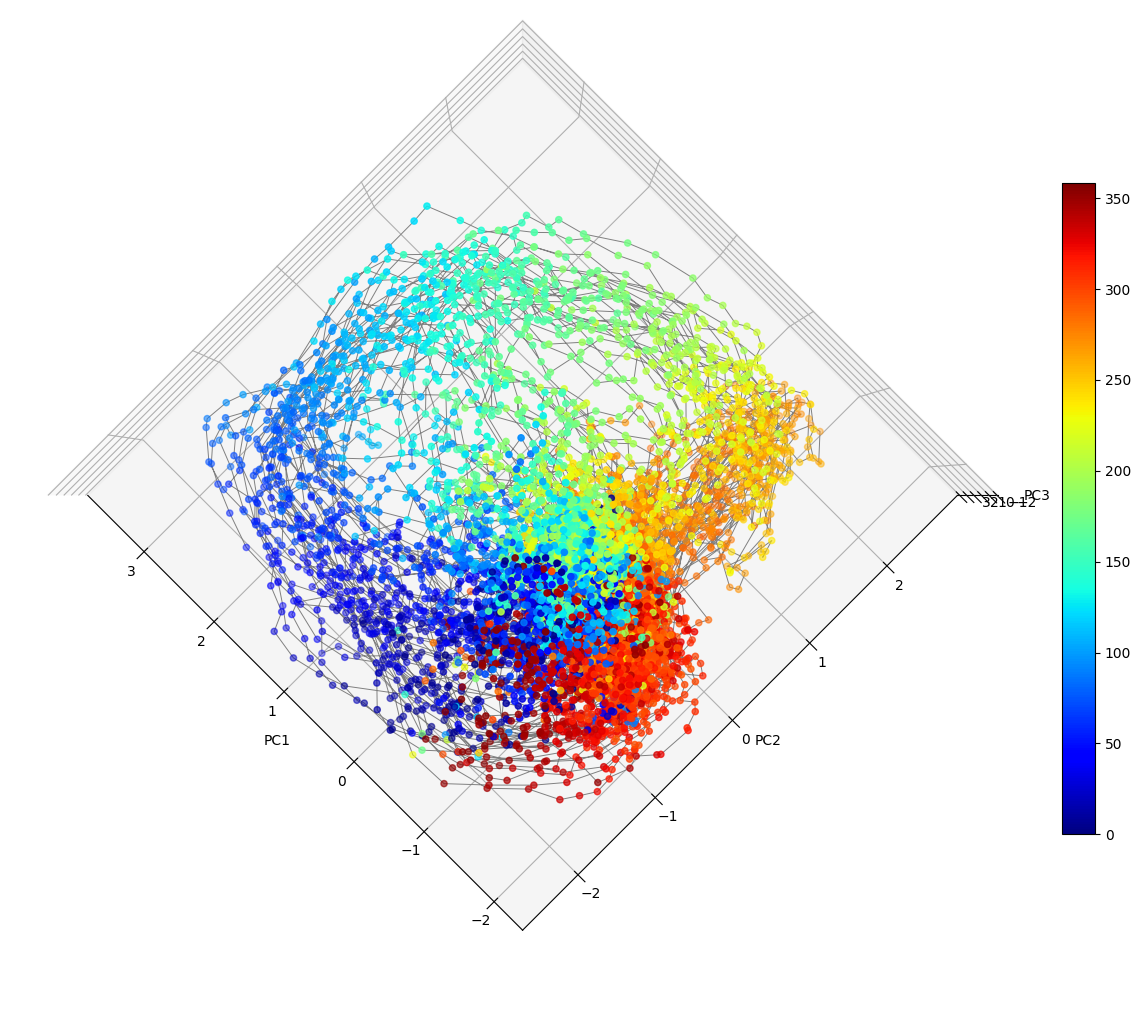

In [176]:
df = df_calcium_day8.loc[df_calcium_day8['Velocity'] > 3]

n_neurons = 700

bin_size = 6

data_neuro_A = np.mean(np.reshape(df.values[-48000: ,18:], (int(48000/bin_size), n_neurons, int(bin_size))), axis=2)
data_position_A = np.mean(np.reshape(df['Position'].values[-48000:], (int(48000/bin_size), int(bin_size))), axis=1, dtype=int)
data_velocity_A = np.mean(np.reshape(df['Velocity'].values[-48000:], (int(48000/bin_size), int(bin_size))), axis=1)


X_A = data_neuro_A

pca = PCA(n_components=20)
X_A_pca = pca.fit_transform(X_A)

# Creating figure
fig = plt.figure(figsize = (14, 14))
ax = plt.axes(projection ="3d")

#x = pca_avg_position['PC1']
#y = pca_avg_position['PC2']
#z = pca_avg_position['PC3']

x = X_A_pca[:48000,0]
y = X_A_pca[:48000,1]
z = X_A_pca[:48000,2]

#print(X_A_pca[:,0])

# Creating plot
#ax.scatter3D(x, y, z, c=pca_avg_position.index, cmap='jet')
p = ax.scatter3D(x, y, z, c=data_position_A[:48000], cmap='jet')
ax.plot(x,y,z, color='grey', linewidth=0.7)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(elev=-90, azim=45, roll=0)

fig.colorbar(p, ax=ax, fraction=0.03)

### **Question:** What do you notice?

##### Interactive plot.

In [178]:
import plotly.graph_objects as go


# Create the 3D scatter plot using Plotly Graph Objects
fig = go.Figure()

# Add the first trace from the first DataFrame
fig.add_trace(go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    name='timepoints',
    marker=dict(size=1, color=data_position_A[:54000])
))



# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    ),
    title='3D Scatter Plot from Two DataFrames'
)

# Show the plot
fig.show()

## Decoding position from neural activity